
# ISIC 2024 - Skin Cancer Detection with 3D-TBP

## EDA PART

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


In [3]:
train_df = pd.read_csv('./dataset/train-metadata.csv')
test_df = pd.read_csv('./dataset/test-metadata.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\1784483441.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./dataset/train-metadata.csv')


In [4]:
print("Train Data Sample:")
train_df.head()


Train Data Sample:


isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx_5  \
0         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
1  IL_6727506     Benign  Benign     NaN     NaN     NaN     NaN   
2         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
3         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
4         NaN     Benign  Benign     NaN     NaN     NaN     NaN   

   mel_mitotic_index  mel_thick_mm  tbp_lv_dnn_lesion_confidence  
0                NaN           NaN                     97.517282  
1                NaN           NaN                      3.141455  
2                NaN           NaN                     99.804040  
3                NaN           NaN                     99.989998  
4                NaN           NaN                     70.442510  

[5 rows x 55 columns]

In [5]:
# print('The number of samples into the train data is {}.'.format(train_df.shape[0]))
print('The number of samples in the train data is {}.'.format(train_df.shape[0]))

The number of samples in the train data is 401059.


In [6]:
print("\nTest Data Sample:")
test_df.head()


Test Data Sample:


isic_id  patient_id  age_approx     sex anatom_site_general  \
0  ISIC_0015657  IP_6074337        45.0    male     posterior torso   
1  ISIC_0015729  IP_1664139        35.0  female     lower extremity   
2  ISIC_0015740  IP_7142616        65.0    male     posterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type  tbp_lv_A  \
0                    2.70  TBP tile: close-up        3D: XP  22.80433   
1                    2.52  TBP tile: close-up        3D: XP  16.64867   
2                    3.16  TBP tile: close-up        3D: XP  24.25384   

   tbp_lv_Aext  ...  tbp_lv_radial_color_std_max  tbp_lv_stdL  tbp_lv_stdLExt  \
0    20.007270  ...                     0.304827     1.281532        2.299935   
1     9.657964  ...                     0.000000     1.271940        2.011223   
2    19.937380  ...                     0.230742     1.080308        2.705857   

   tbp_lv_symm_2axis  tbp_lv_symm_2axis_angle   tbp_lv_x     tbp_lv_y  \
0           0.479339                       20 -155.06510  1511.222000   
1           0.426230                       25 -112.36924   629.535889   
2           0.366071                      110  -84.29282  1303.978000   

     tbp_lv_z                                        attribution  \
0  113.980100             Memorial Sloan Kettering Cancer Center   
1  -15.019287  Frazer Institute, The University of Queensland...   
2  -28.576050                                        FNQH Cairns   

   copyright_license  
0              CC-BY  
1              CC-BY  
2              CC-BY  

[3 rows x 44 columns]

In [7]:
# print('The number of samples into the train data is {}.'.format(train_df.shape[0]))
print('The number of samples in the train data is {}.'.format(test_df.shape[0]))

The number of samples in the train data is 3.


In [8]:
# Check the structure and summary of the datasets
print("\nTrain Data Info:")
train_df.info()

print("\nTest Data Info:")
test_df.info()


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext               

In [9]:
print("\nTrain Data Description:")
train_df.describe()

print("\nTest Data Description:")
test_df.describe()


Train Data Description:

Test Data Description:


age_approx  clin_size_long_diam_mm   tbp_lv_A  tbp_lv_Aext   tbp_lv_B  \
count    3.000000                3.000000   3.000000     3.000000   3.000000   
mean    48.333333                2.793333  21.235613    16.534205  30.055107   
std     15.275252                0.330051   4.037983     5.955101   1.508777   
min     35.000000                2.520000  16.648670     9.657964  28.384120   
25%     40.000000                2.610000  19.726500    14.797672  29.423900   
50%     45.000000                2.700000  22.804330    19.937380  30.463680   
75%     55.000000                2.930000  23.529085    19.972325  30.890600   
max     65.000000                3.160000  24.253840    20.007270  31.317520   

       tbp_lv_Bext   tbp_lv_C  tbp_lv_Cext   tbp_lv_H  tbp_lv_Hext  ...  \
count     3.000000   3.000000     3.000000   3.000000     3.000000  ...   
mean     27.650733  36.939135    32.498746  54.900061    59.695153  ...   
std       0.679182   1.795292     2.930254   6.153928     9.525959  ...   
min      27.043640  35.467806    29.169579  51.220960    53.505430  ...   
25%      27.283979  35.938953    31.404790  51.347845    54.210420  ...   
50%      27.524318  36.410100    33.640000  51.474730    54.915410  ...   
75%      27.954279  37.674800    34.163330  56.739612    62.790014  ...   
max      28.384240  38.939500    34.686660  62.004494    70.664619  ...   

       tbp_lv_norm_color  tbp_lv_perimeterMM  tbp_lv_radial_color_std_max  \
count           3.000000            3.000000                     3.000000   
mean            0.621704            7.952809                     0.178523   
std             0.578214            1.531253                     0.158981   
min             0.000000            6.340311                     0.000000   
25%             0.360870            7.235590                     0.115371   
50%             0.721739            8.130868                     0.230742   
75%             0.932557            8.759058                     0.267784   
max             1.143374            9.387248                     0.304827   

       tbp_lv_stdL  tbp_lv_stdLExt  tbp_lv_symm_2axis  \
count     3.000000        3.000000           3.000000   
mean      1.211260        2.339005           0.423880   
std       0.113509        0.348961           0.056670   
min       1.080308        2.011223           0.366071   
25%       1.176124        2.155579           0.396150   
50%       1.271940        2.299935           0.426230   
75%       1.276736        2.502896           0.452784   
max       1.281532        2.705857           0.479339   

       tbp_lv_symm_2axis_angle    tbp_lv_x     tbp_lv_y    tbp_lv_z  
count                 3.000000    3.000000     3.000000    3.000000  
mean                 51.666667 -117.242387  1148.245296   23.461588  
std                  50.579970   35.636913   461.012045   78.683844  
min                  20.000000 -155.065100   629.535889  -28.576050  
25%                  22.500000 -133.717170   966.756944  -21.797669  
50%                  25.000000 -112.369240  1303.978000  -15.019287  
75%                  67.500000  -98.331030  1407.600000   49.480406  
max                 110.000000  -84.292820  1511.222000  113.980100  

[8 rows x 34 columns]

In [10]:
print("Columns in the training dataset:")
train_df.columns

Columns in the training dataset:


Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [11]:
# Check for duplicate records in the training dataset
duplicates = train_df.duplicated().sum()
print(f'Number of duplicate records in the training dataset: {duplicates}')

Number of duplicate records in the training dataset: 0


In [12]:
# Check for missing values in each column
missing_values = train_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Calculate the percentage of missing values for each column
percent_missing = (missing_values / train_df.shape[0]) * 100
print("\nPercentage of missing values in each column:")
print(percent_missing)



Missing values in each column:
isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                    

In [13]:
# Check the number of unique values in each column for the training dataset
print("Unique Values in Train Data:")
print(train_df.nunique())

# Check the number of unique values in each column for the test dataset
print("\nUnique Values in Test Data:")
print(test_df.nunique())

Unique Values in Train Data:
isic_id                         401059
target                               2
patient_id                        1042
age_approx                          16
sex                                  2
anatom_site_general                  5
clin_size_long_diam_mm            1758
image_type                           1
tbp_tile_type                        2
tbp_lv_A                        386052
tbp_lv_Aext                     385304
tbp_lv_B                        389890
tbp_lv_Bext                     387763
tbp_lv_C                        390703
tbp_lv_Cext                     388865
tbp_lv_H                        389798
tbp_lv_Hext                     390743
tbp_lv_L                        395726
tbp_lv_Lext                     396358
tbp_lv_areaMM2                    8029
tbp_lv_area_perim_ratio         167648
tbp_lv_color_std_mean           371189
tbp_lv_deltaA                   398257
tbp_lv_deltaB                   398886
tbp_lv_deltaL                   396

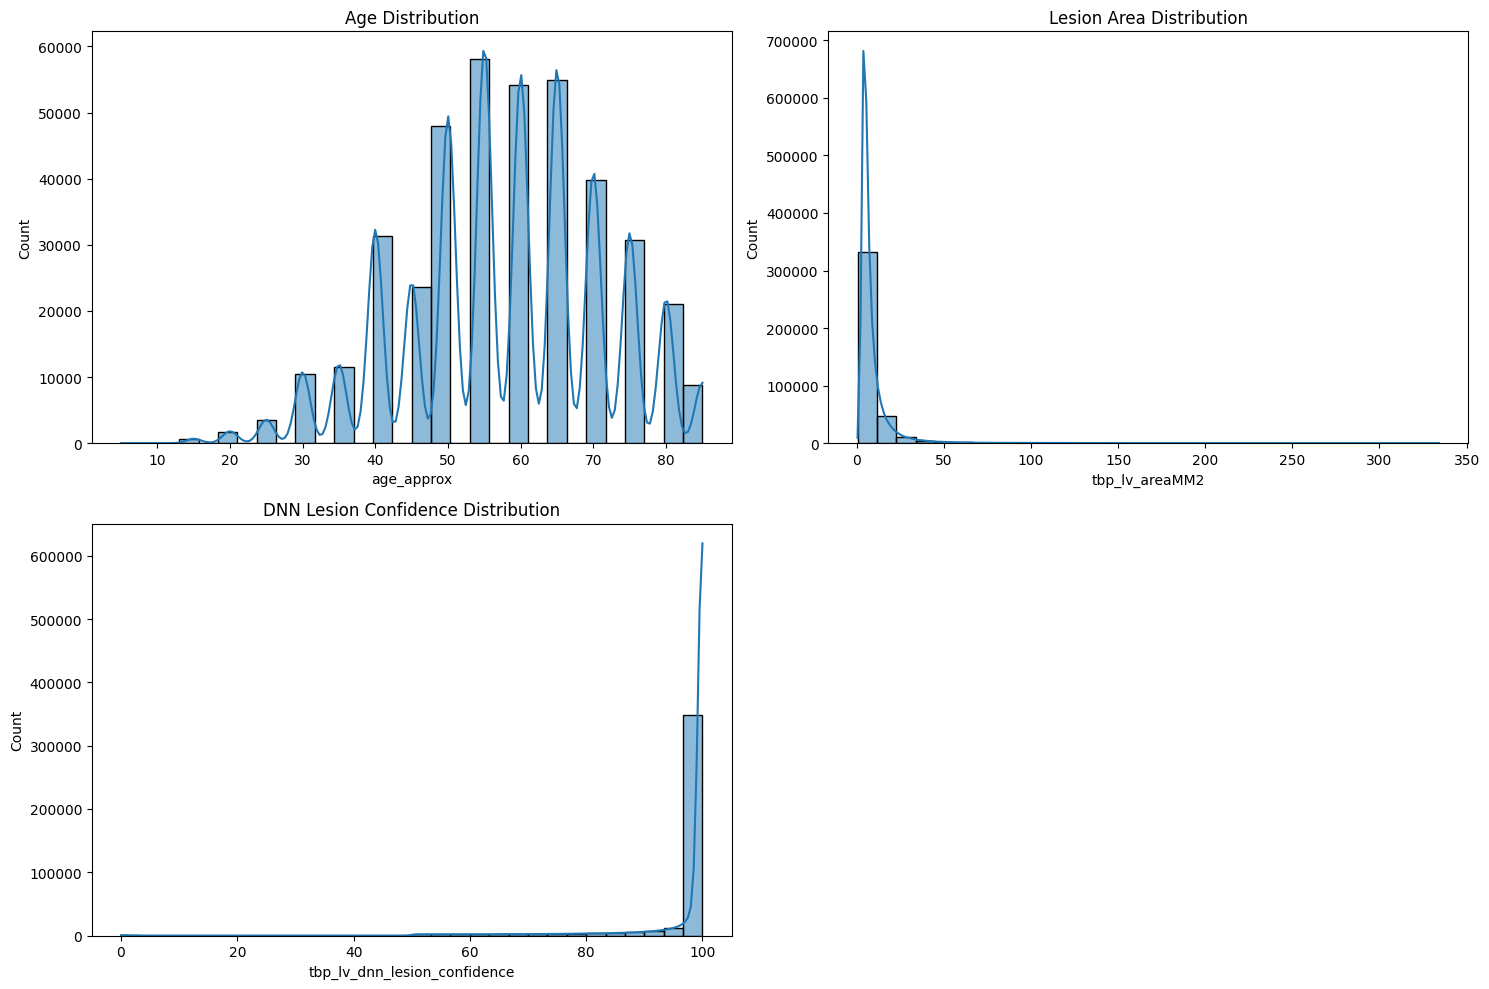

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Histogram for age
plt.subplot(2, 2, 1)
sns.histplot(train_df['age_approx'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')

# Histogram for lesion size
plt.subplot(2, 2, 2)
sns.histplot(train_df['tbp_lv_areaMM2'].dropna(), kde=True, bins=30)
plt.title('Lesion Area Distribution')

# Histogram for DNN lesion confidence
plt.subplot(2, 2, 3)
sns.histplot(train_df['tbp_lv_dnn_lesion_confidence'].dropna(), kde=True, bins=30)
plt.title('DNN Lesion Confidence Distribution')

plt.tight_layout()
plt.show()


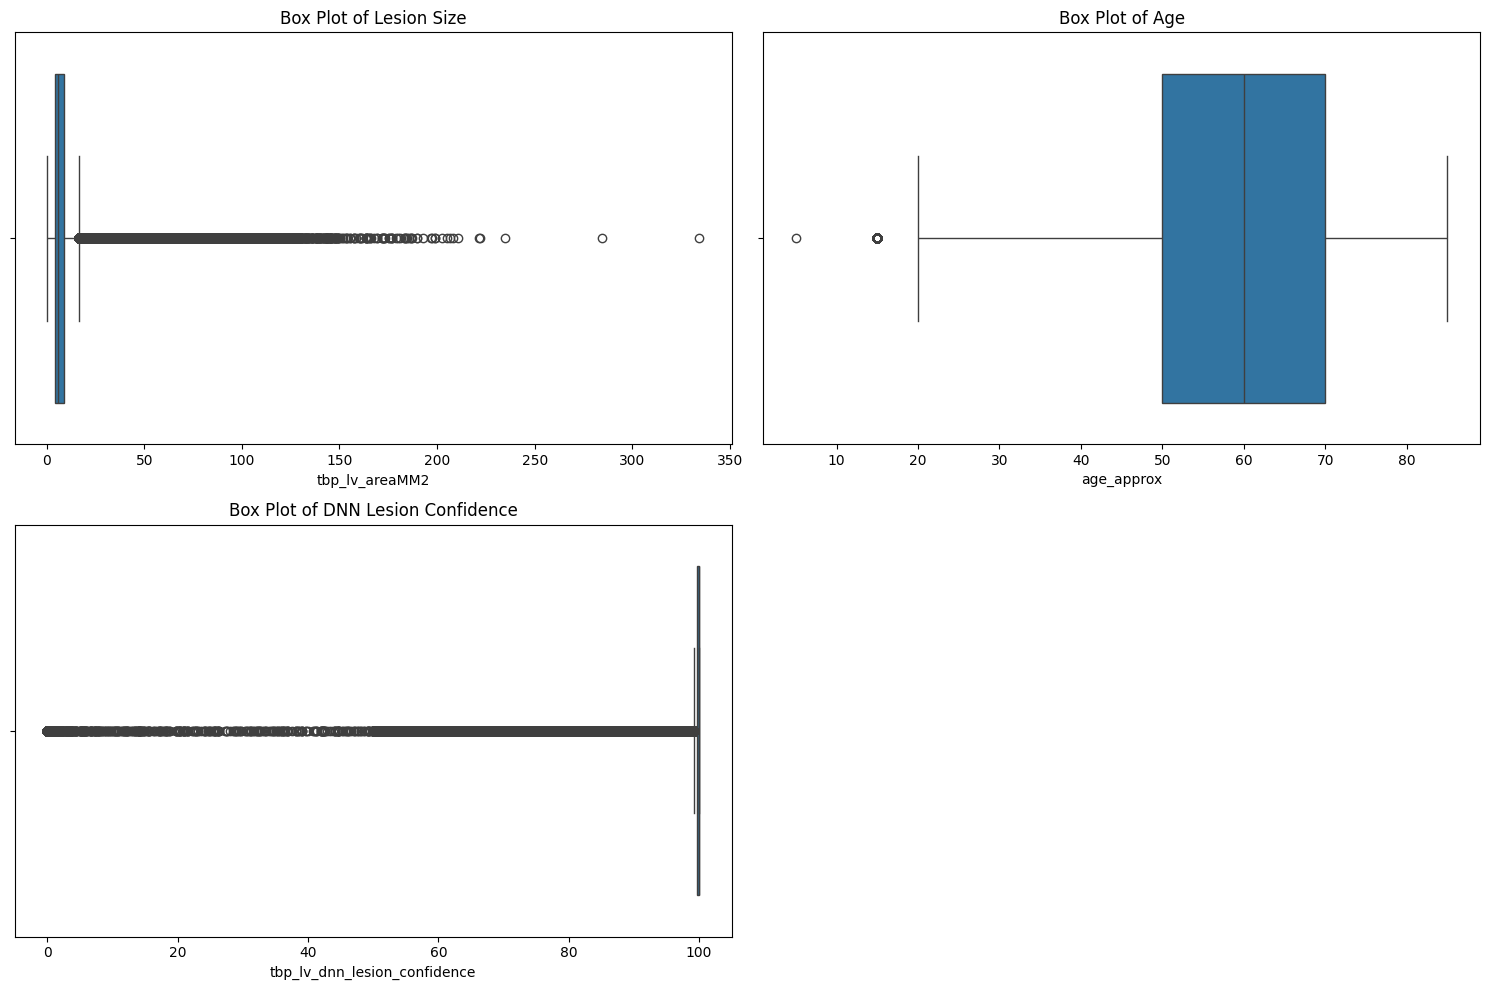

In [15]:
plt.figure(figsize=(15, 10))

# Box plot for lesion size
plt.subplot(2, 2, 1)
sns.boxplot(x=train_df['tbp_lv_areaMM2'])
plt.title('Box Plot of Lesion Size')

# Box plot for age
plt.subplot(2, 2, 2)
sns.boxplot(x=train_df['age_approx'])
plt.title('Box Plot of Age')

# Box plot for DNN lesion confidence
plt.subplot(2, 2, 3)
sns.boxplot(x=train_df['tbp_lv_dnn_lesion_confidence'])
plt.title('Box Plot of DNN Lesion Confidence')

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


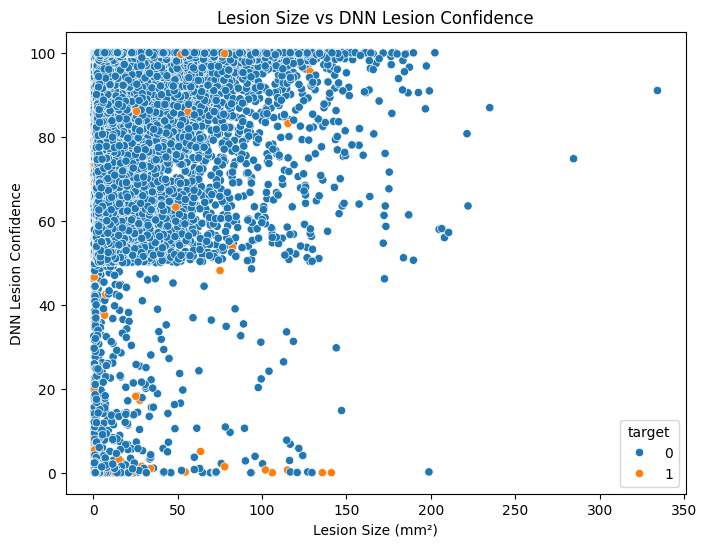

In [16]:
# Scatter plot between lesion size and DNN lesion confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df['tbp_lv_areaMM2'], y=train_df['tbp_lv_dnn_lesion_confidence'], hue=train_df['target'])
plt.title('Lesion Size vs DNN Lesion Confidence')
plt.xlabel('Lesion Size (mm²)')
plt.ylabel('DNN Lesion Confidence')
plt.show()


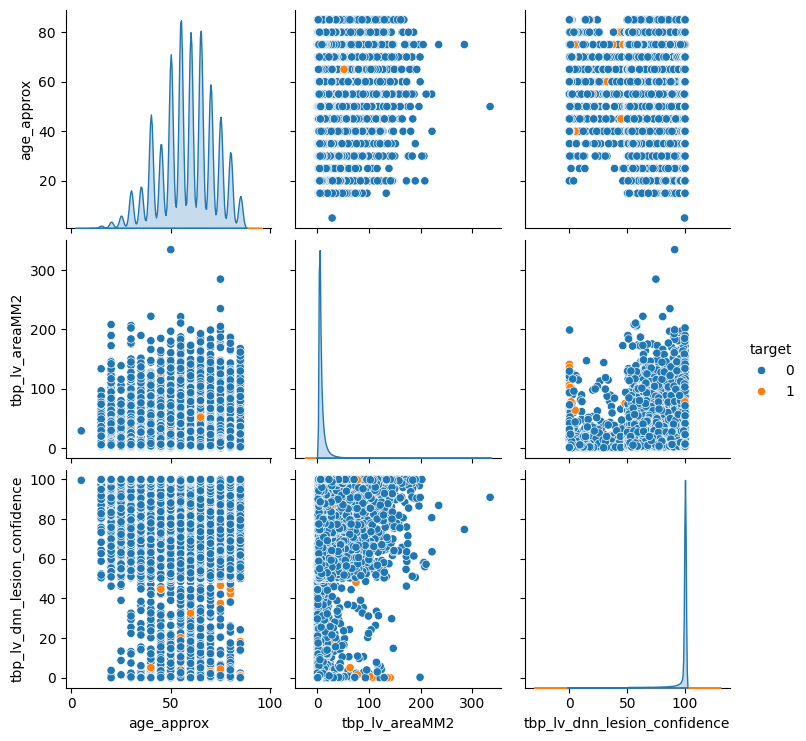

In [17]:
# Pair plot for a subset of features
sns.pairplot(train_df[['age_approx', 'tbp_lv_areaMM2', 'tbp_lv_dnn_lesion_confidence', 'target']], hue='target')
plt.show()


In [18]:
# Outlier detection using IQR for lesion size
Q1 = train_df['tbp_lv_areaMM2'].quantile(0.25)
Q3 = train_df['tbp_lv_areaMM2'].quantile(0.75)
IQR = Q3 - Q1

outliers = train_df[(train_df['tbp_lv_areaMM2'] < (Q1 - 1.5 * IQR)) | (train_df['tbp_lv_areaMM2'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers in lesion size: {outliers.shape[0]}')


Number of outliers in lesion size: 36748


In [19]:
from scipy import stats
import numpy as np

# Outlier detection using Z-scores
# Apply dropna() to the DataFrame subset to handle missing values
z_scores = np.abs(stats.zscore(train_df[['tbp_lv_areaMM2', 'age_approx', 'tbp_lv_dnn_lesion_confidence']].dropna()))

# Identify outliers (those with a Z-score greater than 3)
outliers_z = (z_scores > 3).sum(axis=0)

print('Number of outliers using Z-score method:', outliers_z)


Number of outliers using Z-score method: tbp_lv_areaMM2                   7542
age_approx                        645
tbp_lv_dnn_lesion_confidence    13384
dtype: int64


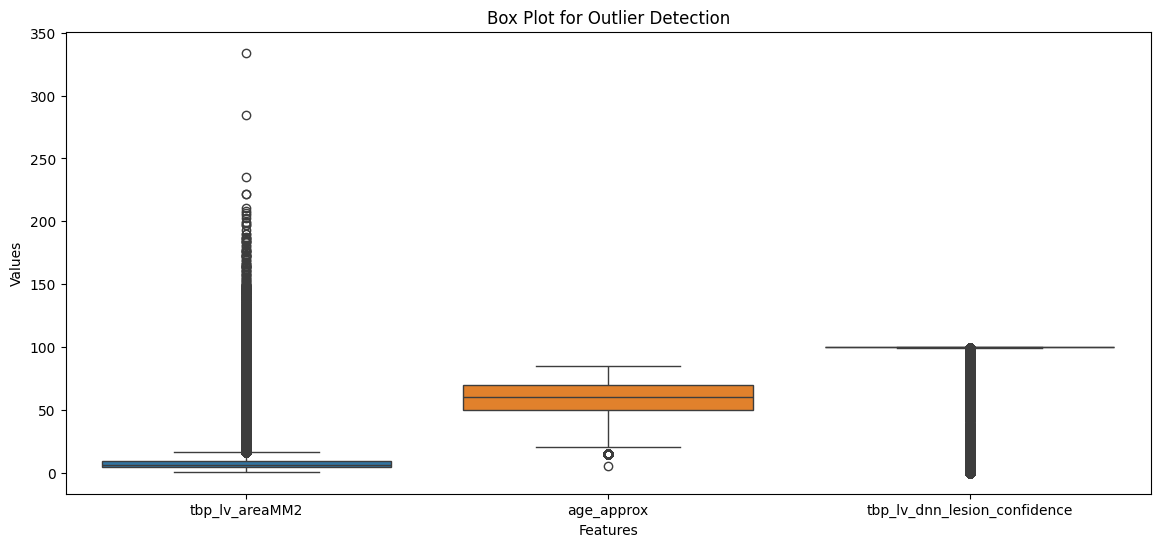

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest and drop any rows with missing values
columns_of_interest = ['tbp_lv_areaMM2', 'age_approx', 'tbp_lv_dnn_lesion_confidence']
df_cleaned = train_df[columns_of_interest].dropna()

# Create a box plot for each column to visualize outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_cleaned)

# Add title and labels
plt.title('Box Plot for Outlier Detection')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()


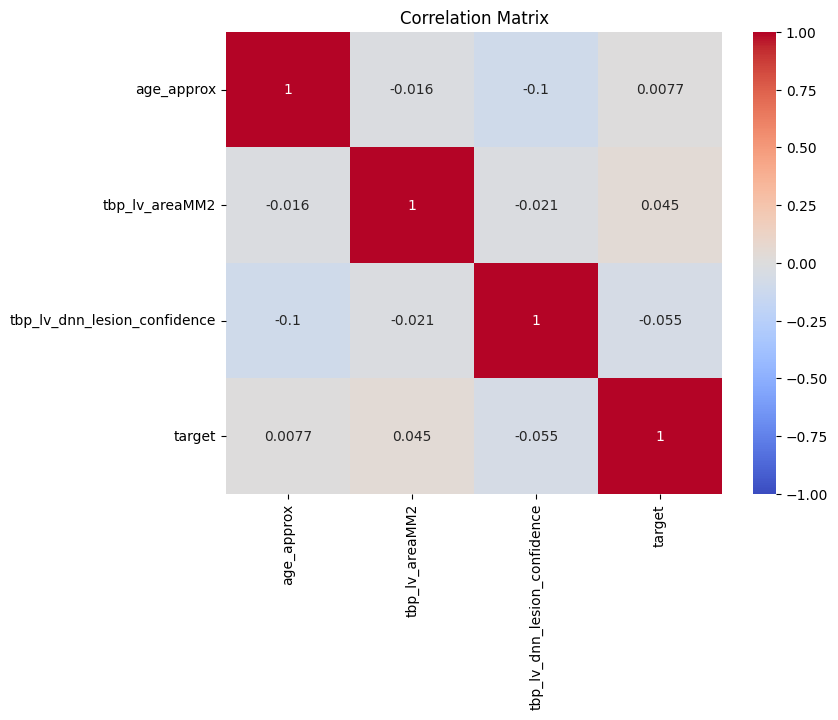

In [21]:
# Compute the correlation matrix
corr_matrix = train_df[['age_approx', 'tbp_lv_areaMM2', 'tbp_lv_dnn_lesion_confidence', 'target']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [22]:
# Impute missing values for numerical features with mean
for col in ['age_approx', 'tbp_lv_areaMM2', 'tbp_lv_dnn_lesion_confidence']:
    train_df[col].fillna(train_df[col].mean(), inplace=True)

# Check for remaining missing values
print(train_df.isnull().sum())


C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\1662445069.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mean(), inplace=True)


isic_id                              0
target                               0
patient_id                           0
age_approx                           0
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        0
tbp_lv_deltaLB           

In [23]:
# Descriptive statistics
print(train_df[['age_approx', 'tbp_lv_areaMM2', 'tbp_lv_dnn_lesion_confidence']].describe())


          age_approx  tbp_lv_areaMM2  tbp_lv_dnn_lesion_confidence
count  401059.000000   401059.000000                  4.010590e+05
mean       58.012986        8.539975                  9.716220e+01
std        13.548654        9.679312                  8.995782e+00
min         5.000000        0.431601                  1.261082e-16
25%        50.000000        4.109589                  9.966882e+01
50%        60.000000        5.685870                  9.999459e+01
75%        70.000000        9.119910                  9.999996e+01
max        85.000000      334.152700                  1.000000e+02


In [24]:
# Shapiro-Wilk test for normality
for column in ['age_approx', 'tbp_lv_areaMM2', 'tbp_lv_dnn_lesion_confidence']:
    stat, p = stats.shapiro(train_df[column].dropna())
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p}')


Shapiro-Wilk Test for age_approx: Statistics=0.9796548345885825, p-value=3.674806228005634e-95
Shapiro-Wilk Test for tbp_lv_areaMM2: Statistics=0.5158353030119565, p-value=1.4948355958698894e-193
Shapiro-Wilk Test for tbp_lv_dnn_lesion_confidence: Statistics=0.3580790713719926, p-value=5.260568521425163e-204


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 401059.
  res = hypotest_fun_out(*samples, **kwds)


In [25]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit a linear model
X = train_df[['age_approx', 'tbp_lv_areaMM2']]
X = sm.add_constant(X)
y = train_df['tbp_lv_dnn_lesion_confidence']
model = sm.OLS(y, X).fit()

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan Test:', bp_test)


Breusch-Pagan Test: (782.2574062101417, 1.3644654004719609e-170, 391.8901511389965, 9.340271920045699e-171)


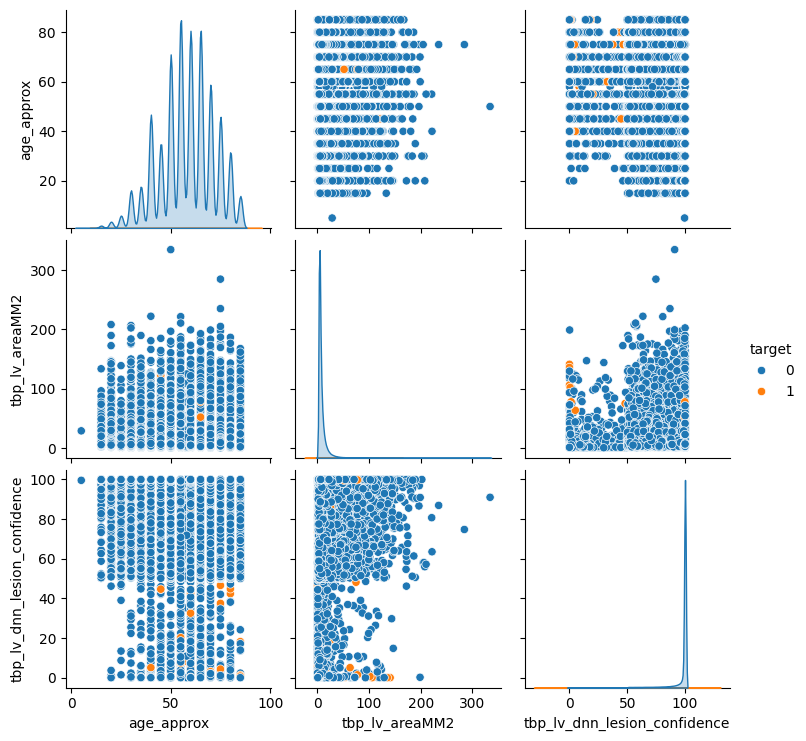

In [26]:
# Pairwise plots
sns.pairplot(train_df[['age_approx', 'tbp_lv_areaMM2', 'tbp_lv_dnn_lesion_confidence', 'target']], hue='target')
plt.show()


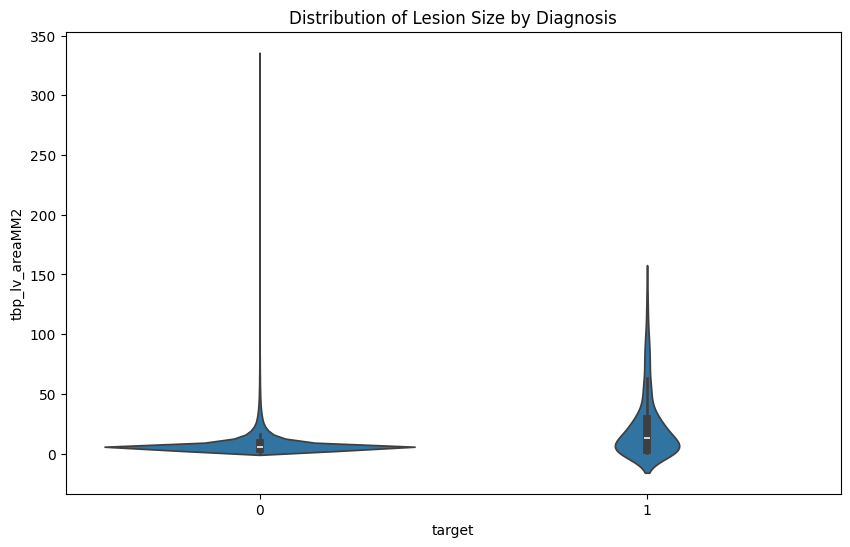

In [27]:
# Violin plot to display the distribution of lesion sizes by diagnosis
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='tbp_lv_areaMM2', data=train_df)
plt.title('Distribution of Lesion Size by Diagnosis')
plt.show()


In [28]:
# Examine and remove outliers if necessary
print('Outliers in lesion size:', outliers[['tbp_lv_areaMM2']].head())

# Removing outliers from dataset
train_df_cleaned = train_df[~train_df['tbp_lv_areaMM2'].isin(outliers['tbp_lv_areaMM2'])]
print(f'Number of rows after removing outliers: {train_df_cleaned.shape[0]}')


Outliers in lesion size:     tbp_lv_areaMM2
22       76.693564
41       28.523180
49       31.975980
69       23.531619
76       28.617001
Number of rows after removing outliers: 364311


Distribution of Gender in the Dataset:
sex
male      265546
female    123996
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\3587825061.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


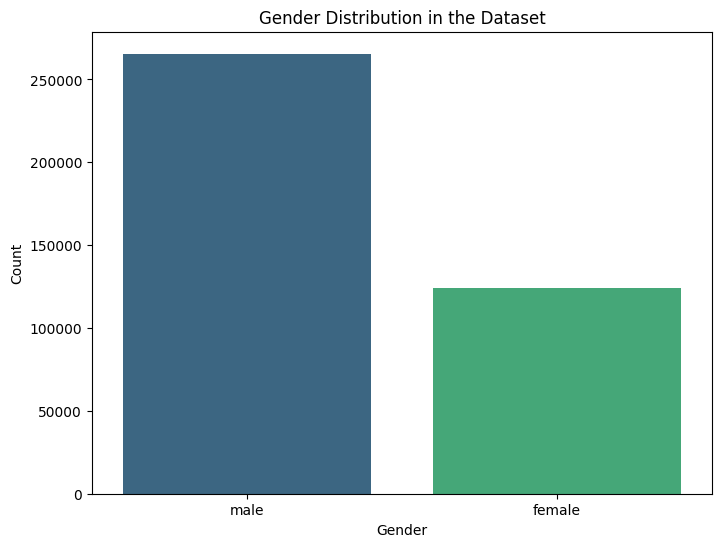

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of men and women in the dataset
gender_counts = train_df['sex'].value_counts()

# Print the counts
print("Distribution of Gender in the Dataset:")
print(gender_counts)

# Visualize the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

# Add title and labels
plt.title('Gender Distribution in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


Anscombe's Quartet

In [30]:
import numpy as np

# Select columns with similar statistical properties
df1 = train_df[['tbp_lv_A', 'tbp_lv_areaMM2']].dropna().sample(50)
df2 = train_df[['tbp_lv_B', 'tbp_lv_perimeterMM']].dropna().sample(50)
df3 = train_df[['tbp_lv_C', 'age_approx']].dropna().sample(50)
df4 = train_df[['tbp_lv_H', 'tbp_lv_dnn_lesion_confidence']].dropna().sample(50)

# Rename the columns to match for Anscombe-like quartet
df1.columns = ['x', 'y']
df2.columns = ['x', 'y']
df3.columns = ['x', 'y']
df4.columns = ['x', 'y']

# Combine into one DataFrame with an additional column to distinguish each dataset
df1['dataset'] = 'I'
df2['dataset'] = 'II'
df3['dataset'] = 'III'
df4['dataset'] = 'IV'

# Concatenate all dataframes
anscombe_df = pd.concat([df1, df2, df3, df4], ignore_index=True)


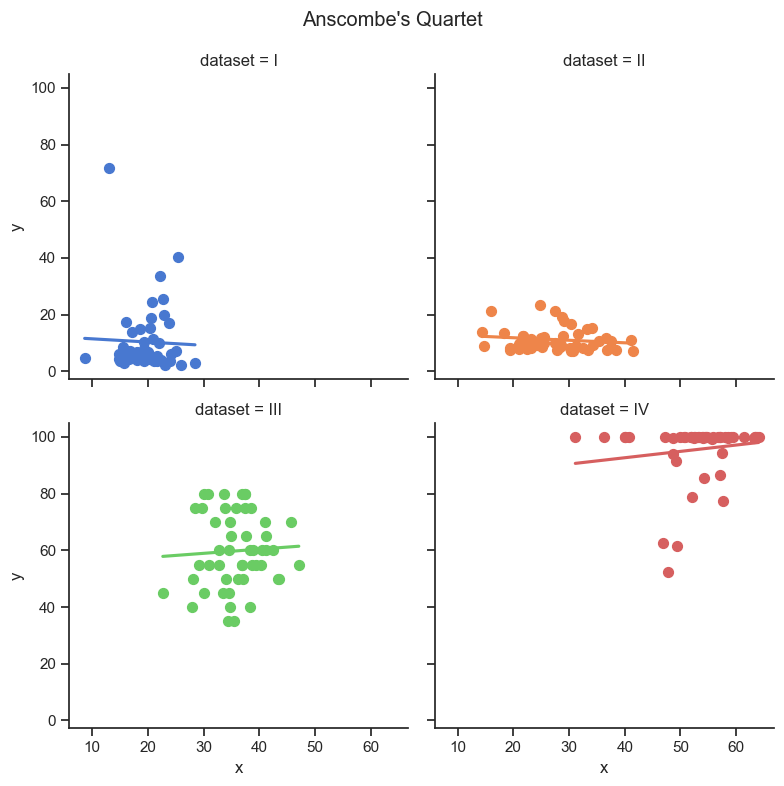

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual aesthetics of the plots
sns.set(style="ticks")

# Create the plot
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=anscombe_df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Add titles to each subplot
plt.subplots_adjust(top=0.9)
plt.suptitle("Anscombe's Quartet")

# Show the plot
plt.show()


Faceting Histograms by Subsets of Data

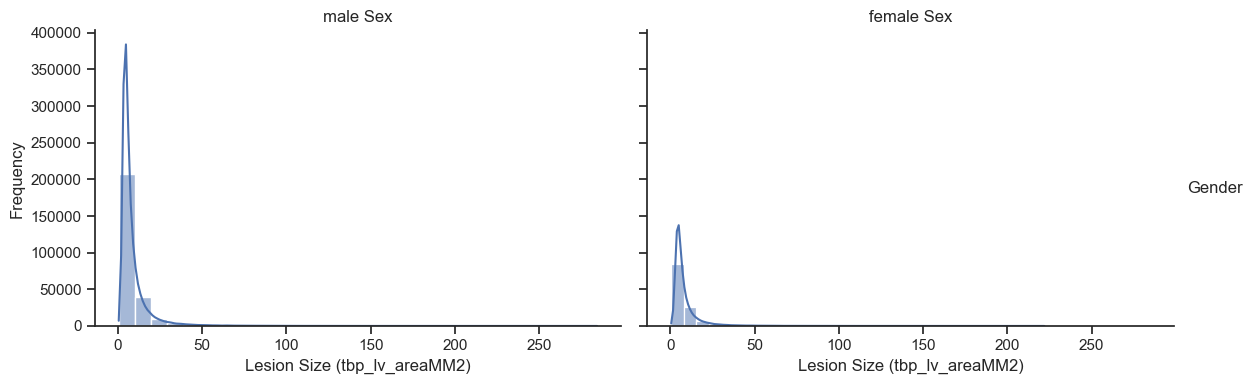

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a FacetGrid with histograms faceted by 'sex'
g = sns.FacetGrid(train_df, col='sex', col_wrap=2, height=4, aspect=1.5)
g.map(sns.histplot, 'tbp_lv_areaMM2', bins=30, kde=True)

# Add titles and labels
g.set_axis_labels('Lesion Size (tbp_lv_areaMM2)', 'Frequency')
g.set_titles(col_template="{col_name} Sex")
g.add_legend(title='Gender')

# Display the plot
plt.show()


Grouped violinplots with split violins

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\3004693173.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./dataset/train-metadata.csv')


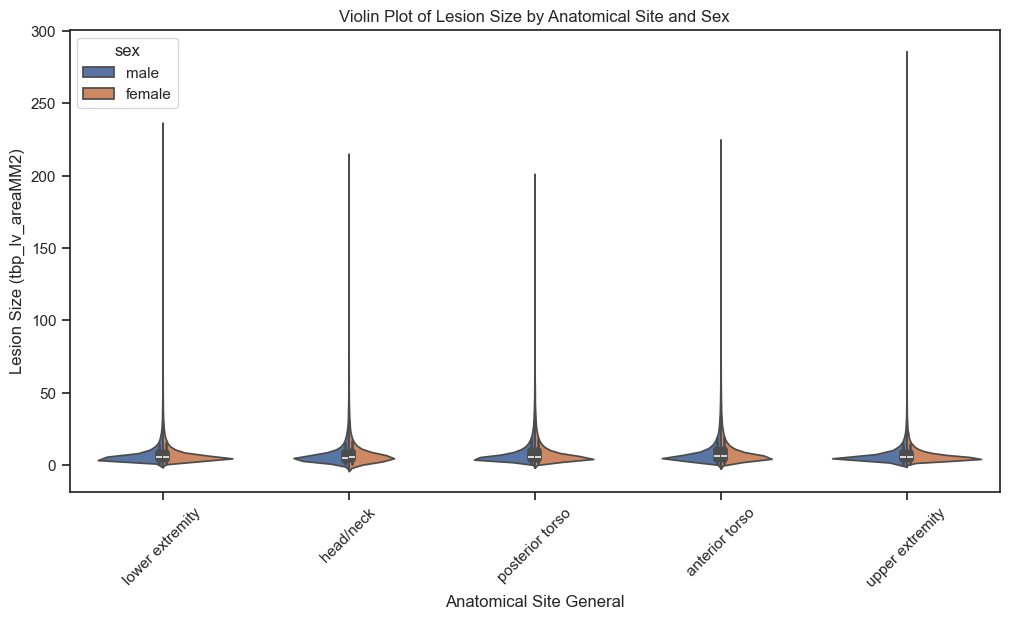

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('./dataset/train-metadata.csv')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a violin plot with split violins
sns.violinplot(x='anatom_site_general', y='tbp_lv_areaMM2', hue='sex', split=True, data=train_df)

# Add titles and labels
plt.title('Violin Plot of Lesion Size by Anatomical Site and Sex')
plt.xlabel('Anatomical Site General')
plt.ylabel('Lesion Size (tbp_lv_areaMM2)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Scatterplot heatmap

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\462974663.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./dataset/train-metadata.csv')


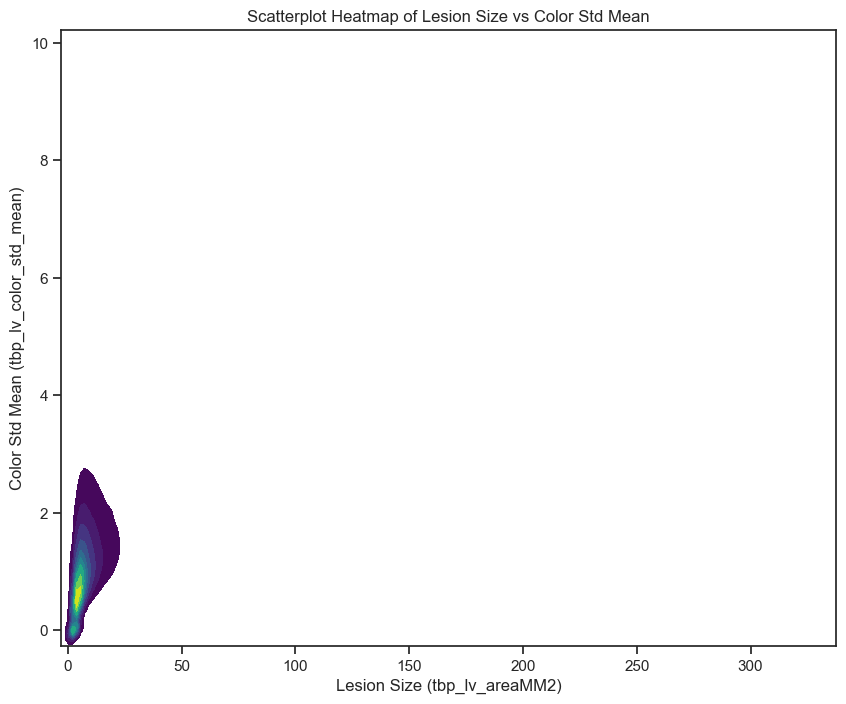

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('./dataset/train-metadata.csv')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a scatterplot heatmap (density plot) using KDE
sns.kdeplot(
    data=train_df,
    x='tbp_lv_areaMM2',
    y='tbp_lv_color_std_mean',
    cmap='viridis',  # Color map for the density plot
    fill=True,       # Fill the area under the KDE curve
    thresh=0.1,      # Threshold for contour plotting
    common_norm=False  # Normalize KDE separately for each hue level
)

# Add titles and labels
plt.title('Scatterplot Heatmap of Lesion Size vs Color Std Mean')
plt.xlabel('Lesion Size (tbp_lv_areaMM2)')
plt.ylabel('Color Std Mean (tbp_lv_color_std_mean)')

# Display the plot
plt.show()


Hexbin plot with marginal distributions

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\2395514633.py:7: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./dataset/train-metadata.csv')


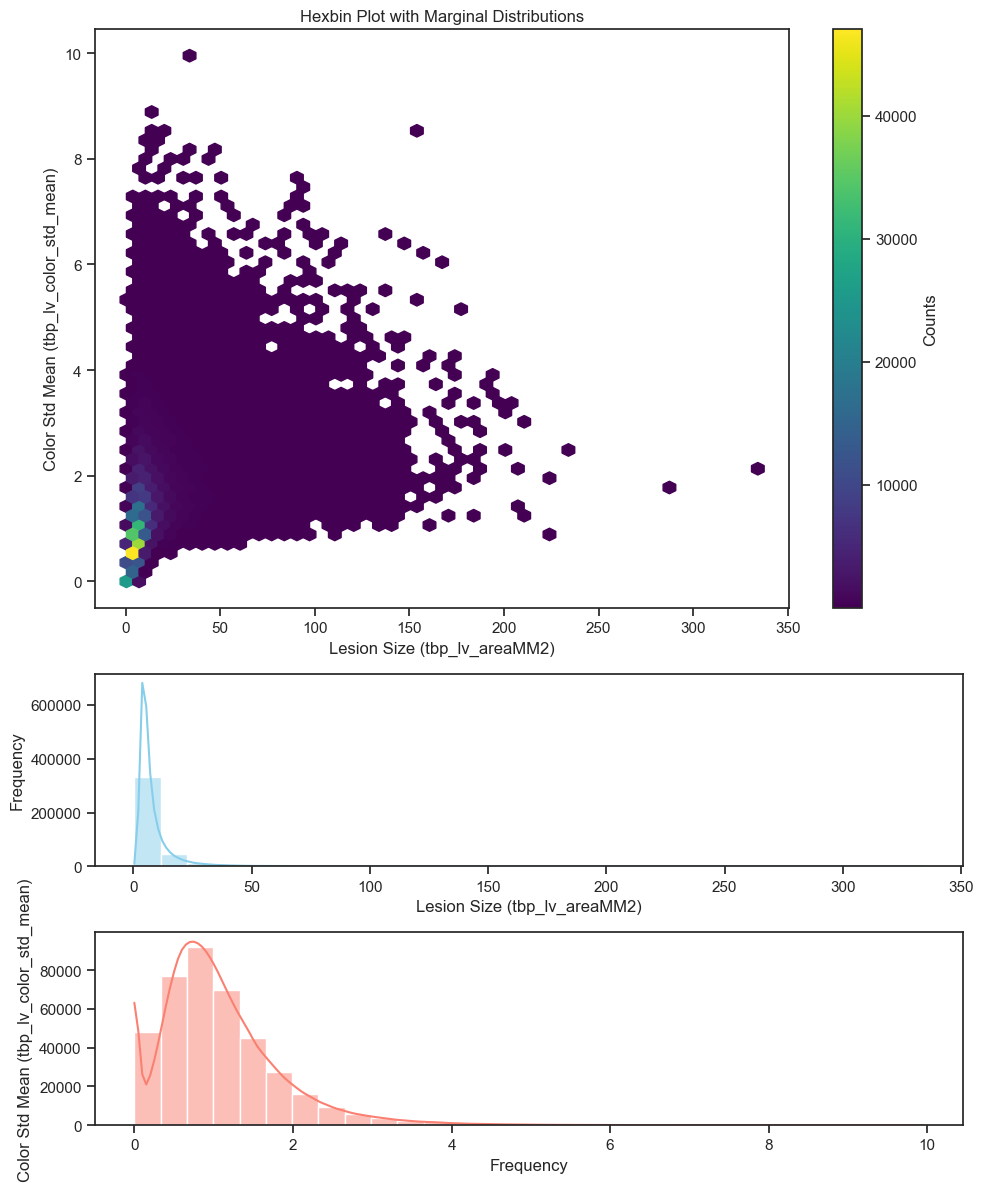

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Load the dataset
train_df = pd.read_csv('./dataset/train-metadata.csv')

# Set up the matplotlib figure with additional subplots for marginals
fig, (ax_main, ax_x, ax_y) = plt.subplots(nrows=3, ncols=1, gridspec_kw={'height_ratios': [3, 1, 1]}, figsize=(10, 12))

# Hexbin plot (main plot)
hb = ax_main.hexbin(
    train_df['tbp_lv_areaMM2'],
    train_df['tbp_lv_color_std_mean'],
    gridsize=50,  # Size of the hexagons
    cmap='viridis',  # Color map for the hexbin plot
    mincnt=1        # Minimum count for hexagons to be drawn
)
ax_main.set_xlabel('Lesion Size (tbp_lv_areaMM2)')
ax_main.set_ylabel('Color Std Mean (tbp_lv_color_std_mean)')
ax_main.set_title('Hexbin Plot with Marginal Distributions')

# Add color bar for hexbin plot
cb = plt.colorbar(hb, ax=ax_main)
cb.set_label('Counts')

# Marginal histogram for x-axis
sns.histplot(
    train_df['tbp_lv_areaMM2'],
    bins=30,
    ax=ax_x,
    kde=True,
    color='skyblue'
)
ax_x.set_xlabel('Lesion Size (tbp_lv_areaMM2)')
ax_x.set_ylabel('Frequency')

# Marginal histogram for y-axis
sns.histplot(
    train_df['tbp_lv_color_std_mean'],
    bins=30,
    ax=ax_y,
    kde=True,
    color='salmon',
    orientation='horizontal'
)
ax_y.set_xlabel('Frequency')
ax_y.set_ylabel('Color Std Mean (tbp_lv_color_std_mean)')

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()


Horizontal boxplot with observations

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\1305046965.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./dataset/train-metadata.csv')


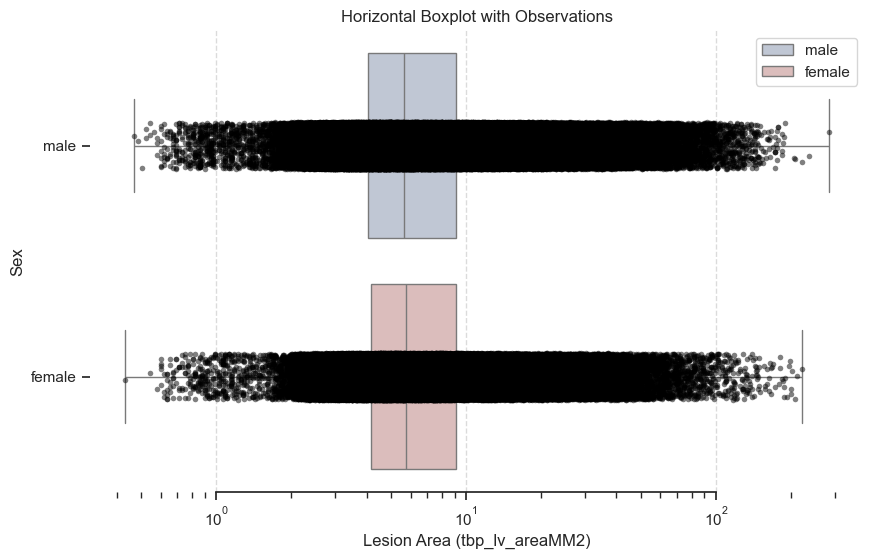

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('./dataset/train-metadata.csv')

# Initialize the figure with a logarithmic x axis
plt.figure(figsize=(10, 6))

# Create a horizontal boxplot with observations
sns.boxplot(
    data=train_df,
    x='tbp_lv_areaMM2',  # Variable for the boxplot
    y='sex',  # Group by sex
    hue='sex',  # Color by sex
    whis=[0, 100],  # Extend whiskers to the data range
    palette='vlag'
)

# Add in points to show each observation
sns.stripplot(
    data=train_df,
    x='tbp_lv_areaMM2',
    y='sex',
    size=4,
    color='black',  # Color for the points
    alpha=0.5
)

# Tweak the visual presentation
plt.xscale("log")  # Set x-axis to logarithmic scale
plt.xlabel('Lesion Area (tbp_lv_areaMM2)')
plt.ylabel('Sex')
plt.title('Horizontal Boxplot with Observations')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
sns.despine(trim=True, left=True)

# Show the plot
plt.show()


Joint kernel density estimate

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\3115997962.py:9: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./dataset/train-metadata.csv')


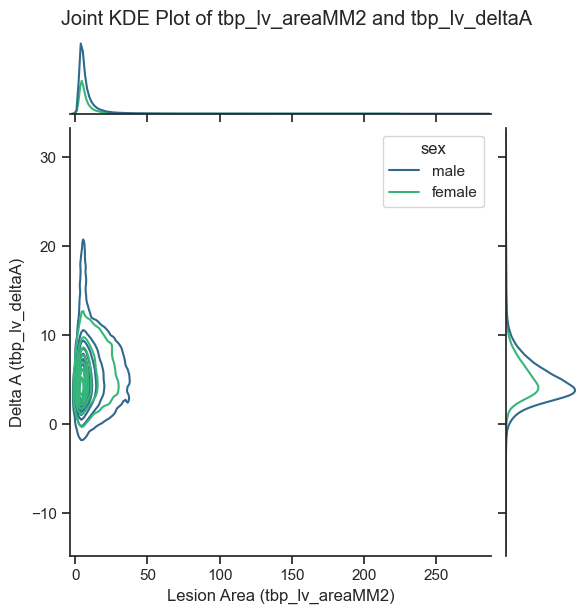

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plots
sns.set_theme(style="ticks")

# Load the dataset
train_df = pd.read_csv('./dataset/train-metadata.csv')

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=train_df,
    x="tbp_lv_areaMM2", y="tbp_lv_deltaA", hue="sex",
    kind="kde",  # Type of plot
    palette="viridis"  # Color palette
)

# Set titles and labels
g.fig.suptitle('Joint KDE Plot of tbp_lv_areaMM2 and tbp_lv_deltaA', y=1.02)
g.set_axis_labels("Lesion Area (tbp_lv_areaMM2)", "Delta A (tbp_lv_deltaA)")
plt.show()


Overlapping densities (‘ridge plot’)

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\1280252502.py:10: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./dataset/train-metadata.csv')
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figur

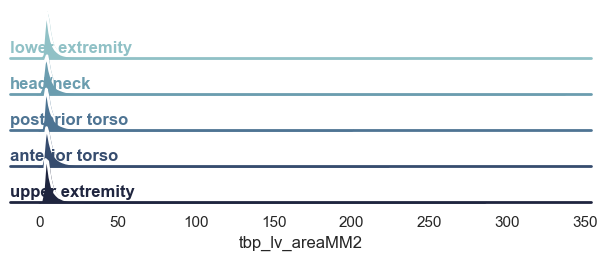

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plots
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Load the dataset
train_df = pd.read_csv('./dataset/train-metadata.csv')

# Create a DataFrame with the necessary columns
df = train_df[['tbp_lv_areaMM2', 'anatom_site_general']].dropna()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(len(df['anatom_site_general'].unique()), rot=-.25, light=.7)
g = sns.FacetGrid(df, row="anatom_site_general", hue="anatom_site_general", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "tbp_lv_areaMM2",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "tbp_lv_areaMM2", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Refline in the middle
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "tbp_lv_areaMM2")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()


Bivariate plot with multiple elements

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\2132170928.py:9: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./dataset/train-metadata.csv')


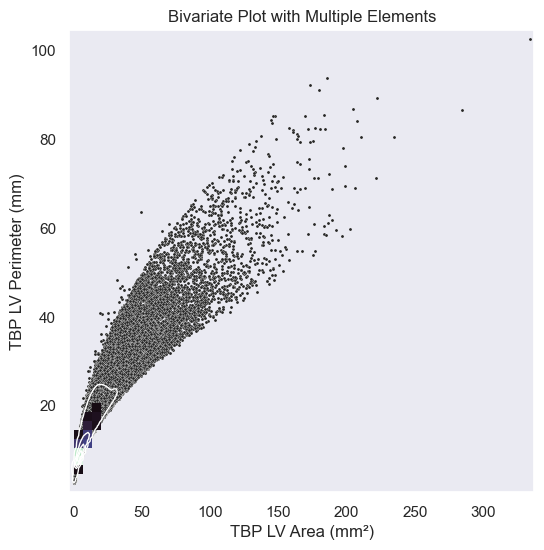

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plots
sns.set_theme(style="dark")

# Load the dataset
train_df = pd.read_csv('./dataset/train-metadata.csv')

# Create a DataFrame with the necessary columns and drop rows with missing values
df = train_df[['tbp_lv_areaMM2', 'tbp_lv_perimeterMM']].dropna()

# Extract the columns for plotting
x = df['tbp_lv_areaMM2']
y = df['tbp_lv_perimeterMM']

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 6))

# Scatterplot
sns.scatterplot(x=x, y=y, s=5, color=".15", ax=ax)

# Histogram with 2D histogram and density contours
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako", ax=ax)

# Kernel Density Estimate (KDE) contours
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1, ax=ax)

# Tweak the visual presentation
ax.set_xlabel('TBP LV Area (mm²)')
ax.set_ylabel('TBP LV Perimeter (mm)')
plt.title('Bivariate Plot with Multiple Elements')

plt.show()


Plotting a three-way ANOVA

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\1499815484.py:9: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./dataset/train-metadata.csv')


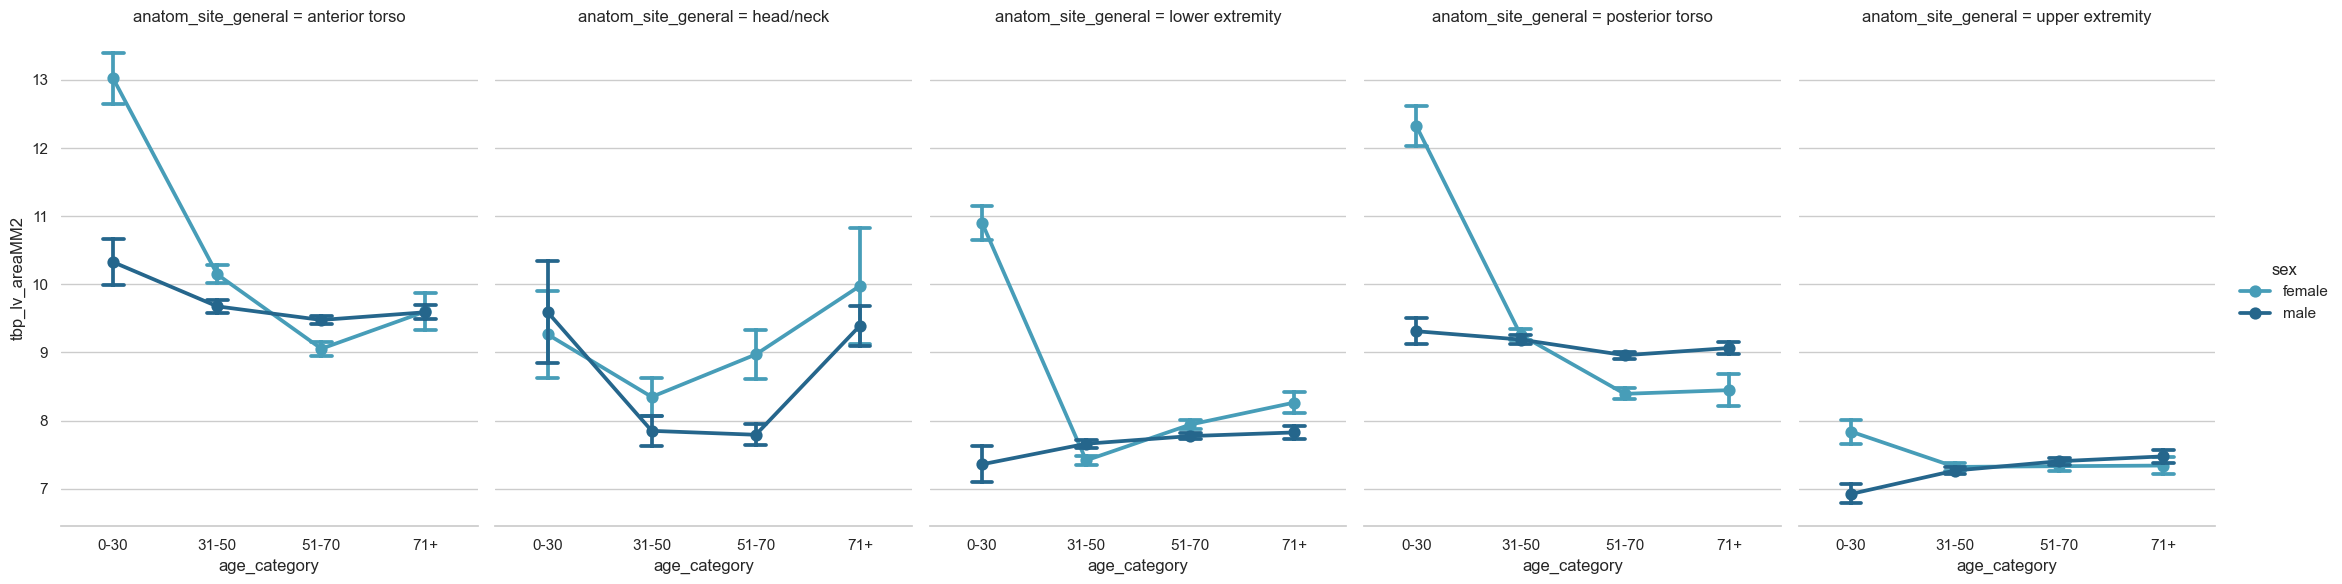

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# Load the dataset
train_df = pd.read_csv('./dataset/train-metadata.csv')

# Prepare the data for plotting
# Convert 'sex' and 'anatom_site_general' to categorical types
train_df['sex'] = train_df['sex'].astype('category')
train_df['anatom_site_general'] = train_df['anatom_site_general'].astype('category')

# Choose 'age_approx' as a continuous variable and categorize it for better visualization
train_df['age_category'] = pd.cut(train_df['age_approx'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71+'])

# Drop rows with missing values in relevant columns
df = train_df[['sex', 'anatom_site_general', 'age_category', 'tbp_lv_areaMM2']].dropna()

# Draw a point plot to show tbp_lv_areaMM2 as a function of three categorical factors
g = sns.catplot(
    data=df, x="age_category", y="tbp_lv_areaMM2", hue="sex", col="anatom_site_general",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75
)

g.despine(left=True)
plt.show()


FacetGrid with custom projection

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\3079930858.py:9: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/train-metadata.csv')


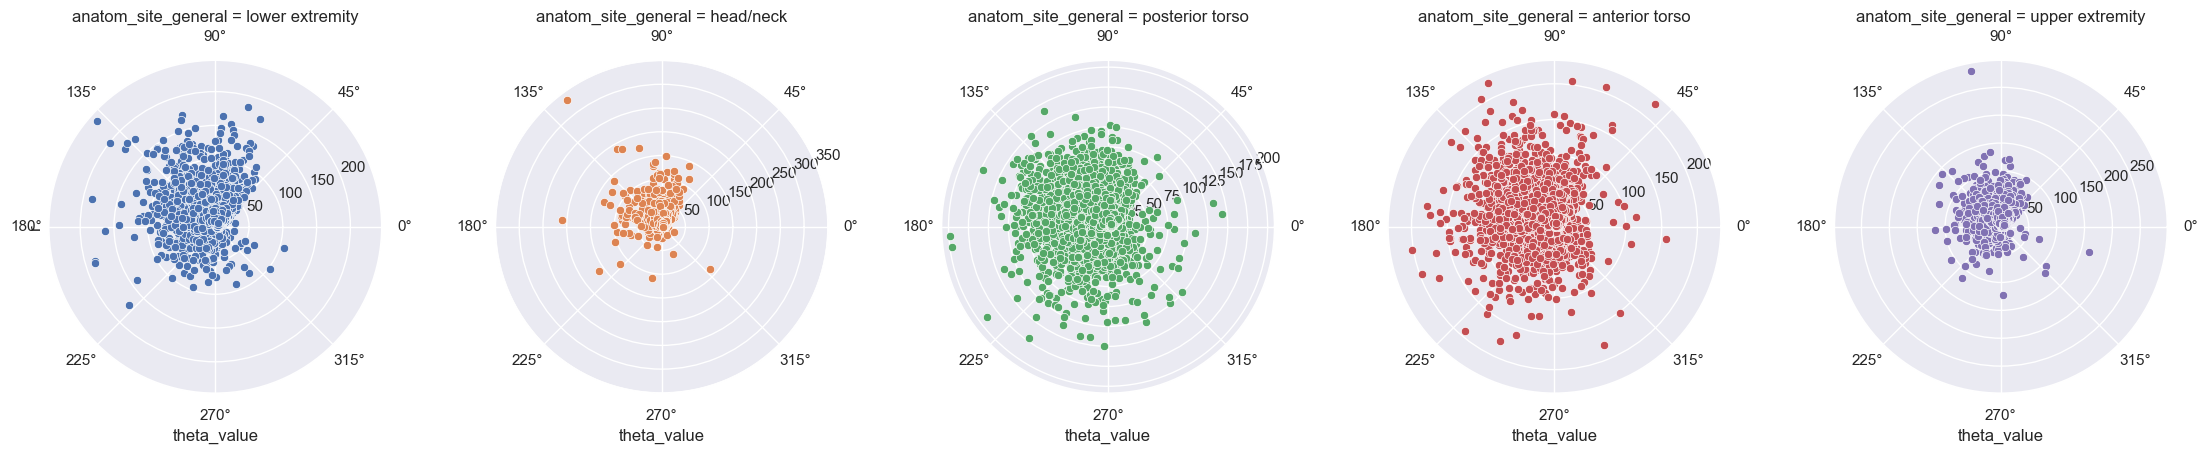

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Load the dataset
df = pd.read_csv('./dataset/train-metadata.csv')

# Prepare the data
# For this example, we'll use 'tbp_lv_areaMM2' as the radial coordinate and 'tbp_lv_color_std_mean' as the angular coordinate
df = df[['tbp_lv_areaMM2', 'tbp_lv_color_std_mean', 'anatom_site_general']].dropna()
df['theta'] = df['tbp_lv_color_std_mean']  # Angular coordinate
df['r'] = df['tbp_lv_areaMM2']  # Radial coordinate

# Convert the dataframe to long-form or "tidy" format
# Use a different name for the values column
df_long = pd.melt(df, id_vars=['r', 'anatom_site_general'], value_vars=['theta'],
                   var_name='measure', value_name='theta_value')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df_long, col="anatom_site_general", hue="anatom_site_general",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta_value", "r")

# Show the plot
plt.show()


Linear regression with marginal distributions

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\3854798556.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/train-metadata.csv')


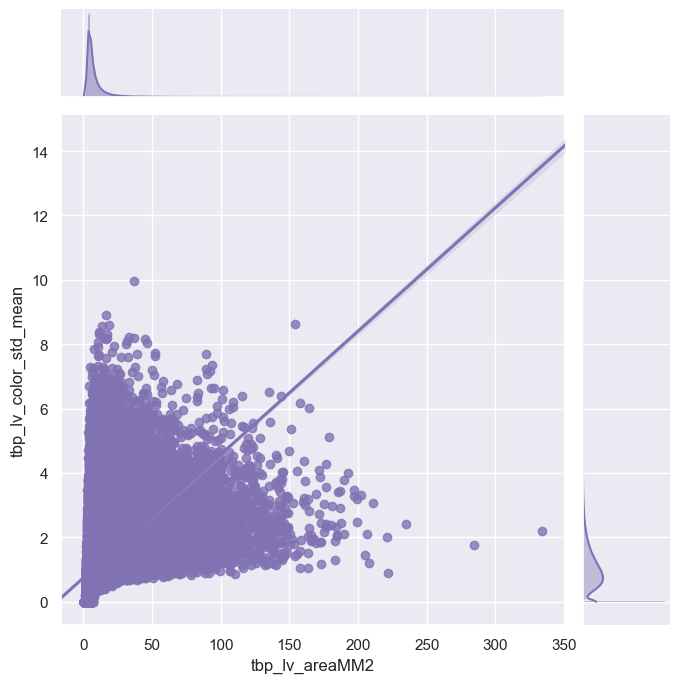

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./dataset/train-metadata.csv')

# Ensure the columns of interest exist in the dataframe
if 'tbp_lv_areaMM2' in df.columns and 'tbp_lv_color_std_mean' in df.columns:
    # Drop missing values for the chosen columns
    df = df[['tbp_lv_areaMM2', 'tbp_lv_color_std_mean']].dropna()

    # Set the theme for the plot
    sns.set_theme(style="darkgrid")

    # Create the joint plot with linear regression and marginal distributions
    g = sns.jointplot(
        x="tbp_lv_areaMM2", y="tbp_lv_color_std_mean", data=df,
        kind="reg", truncate=False,
        color="m", height=7
    )

    # Show the plot
    plt.show()
else:
    print("Required columns are not present in the dataset.")


Discovering structure in heatmap data

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\1198521670.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/train-metadata.csv')


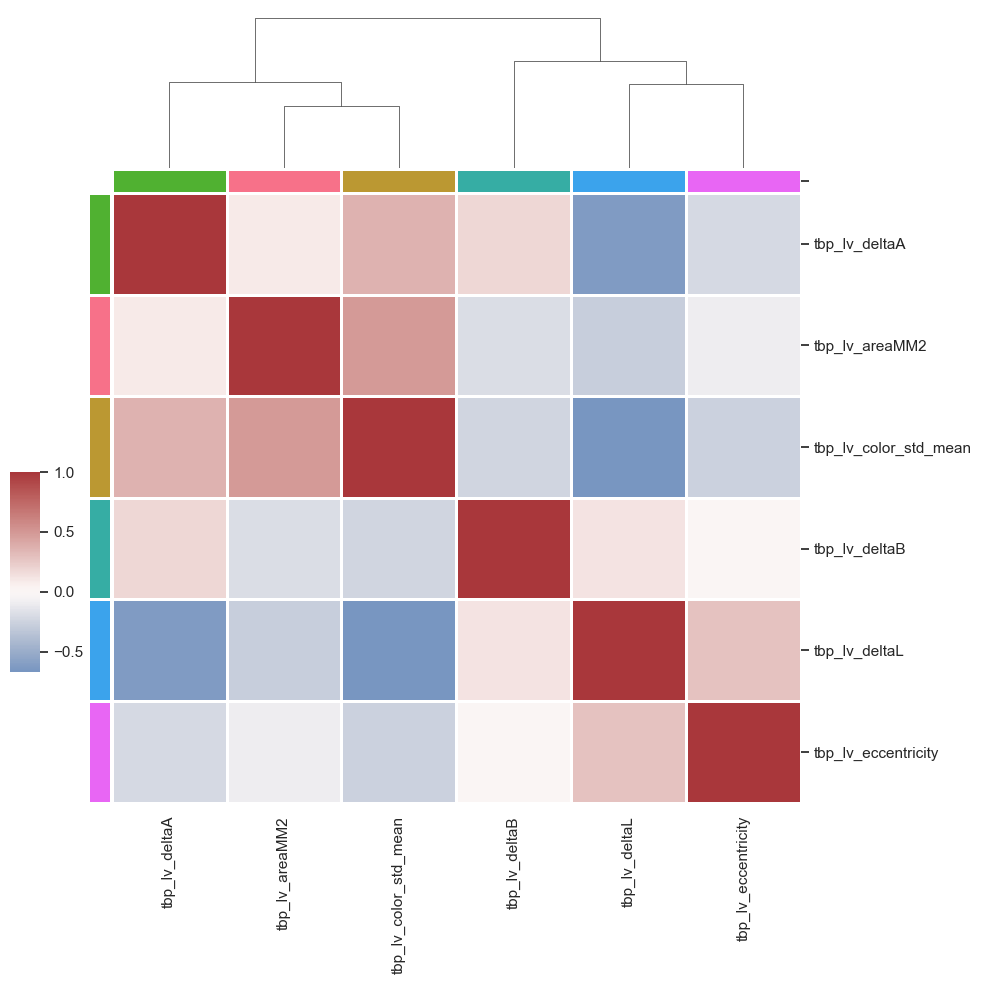

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./dataset/train-metadata.csv')

# Select numeric columns for analysis
numeric_cols = [
    'tbp_lv_areaMM2', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 
    'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_eccentricity'
]
df_numeric = df[numeric_cols]

# Drop rows with any missing values
df_numeric = df_numeric.dropna()

# Calculate the correlation matrix
corr = df_numeric.corr()

# Create a categorical palette for the columns (example: for demonstration, using the same color)
network_pal = sns.color_palette("husl", len(numeric_cols))
network_lut = dict(zip(numeric_cols, network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
column_colors = pd.Series(numeric_cols, index=df_numeric.columns).map(network_lut)

# Draw the clustermap
g = sns.clustermap(corr, center=0, cmap="vlag",
                   row_colors=column_colors, col_colors=column_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(10, 10))

# Remove the row dendrogram
g.ax_row_dendrogram.remove()

# Show the plot
plt.show()


Lineplot from a wide-form dataset

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\811925059.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/train-metadata.csv')


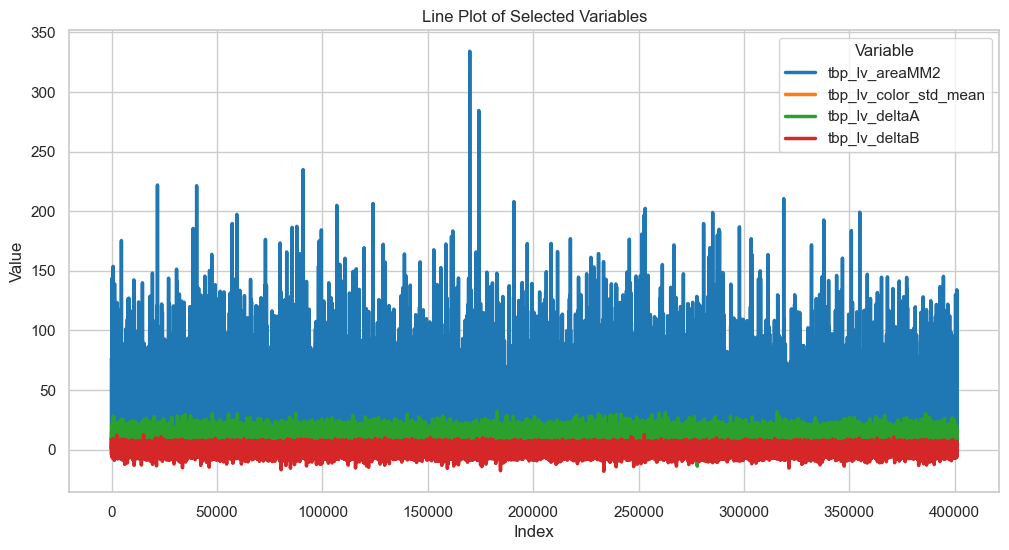

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./dataset/train-metadata.csv')

# For demonstration, we'll use a few numeric columns. 
# Ensure to select columns based on your specific needs.
columns_to_plot = [
    'tbp_lv_areaMM2', 'tbp_lv_color_std_mean', 
    'tbp_lv_deltaA', 'tbp_lv_deltaB'
]

# Assuming these columns represent a time series or sequential data,
# you might need to add a time index. Here we'll use a simulated index for illustration.
df = df[columns_to_plot].copy()
df['index'] = range(len(df))  # Adding a sequential index for plotting

# Melt the dataframe to long-form
df_long = pd.melt(df, id_vars=['index'], var_name='variable', value_name='value')

# Set the plotting theme
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='index', y='value', hue='variable', palette="tab10", linewidth=2.5)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Selected Variables')
plt.legend(title='Variable')

# Show the plot
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\1237934179.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/train-metadata.csv')


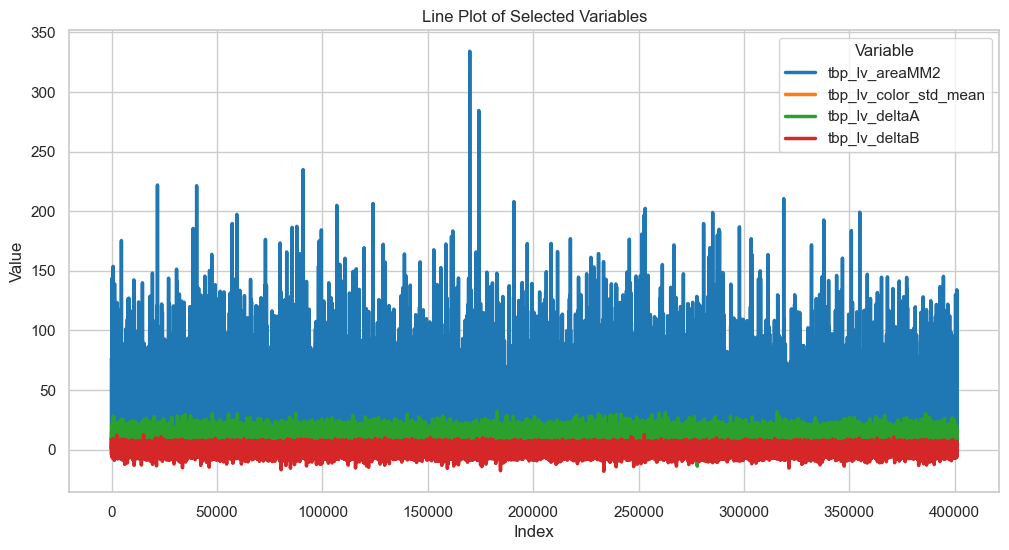

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./dataset/train-metadata.csv')

# For demonstration, we'll use a few numeric columns. 
# Ensure to select columns based on your specific needs.
columns_to_plot = [
    'tbp_lv_areaMM2', 'tbp_lv_color_std_mean', 
    'tbp_lv_deltaA', 'tbp_lv_deltaB'
]

# Check if the columns exist in the DataFrame
missing_columns = [col for col in columns_to_plot if col not in df.columns]
if missing_columns:
    raise ValueError(f"Columns not found in the DataFrame: {missing_columns}")

# Extract the selected columns
data = df[columns_to_plot].copy()

# Add a sequential index for plotting
data['index'] = range(len(data))

# Melt the DataFrame to long-form for Seaborn
data_long = pd.melt(data, id_vars=['index'], var_name='variable', value_name='value')

# Set the plotting theme
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=data_long, x='index', y='value', hue='variable', palette="tab10", linewidth=2.5)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Selected Variables')
plt.legend(title='Variable')

# Show the plot
plt.show()


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#ac6cec; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #6cb0f4">Numeric Variables Distribution</p>

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\2817259189.py:7: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/train-metadata.csv')
C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\2817259189.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=column, data=df_temp, ax=axes[idx], palette="cool")
C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\2817259189.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=column, data=df_temp, ax=axes[idx], palette="cool")
C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\2817259189.py:29: FutureWarning: 

Passing `palette` without ass

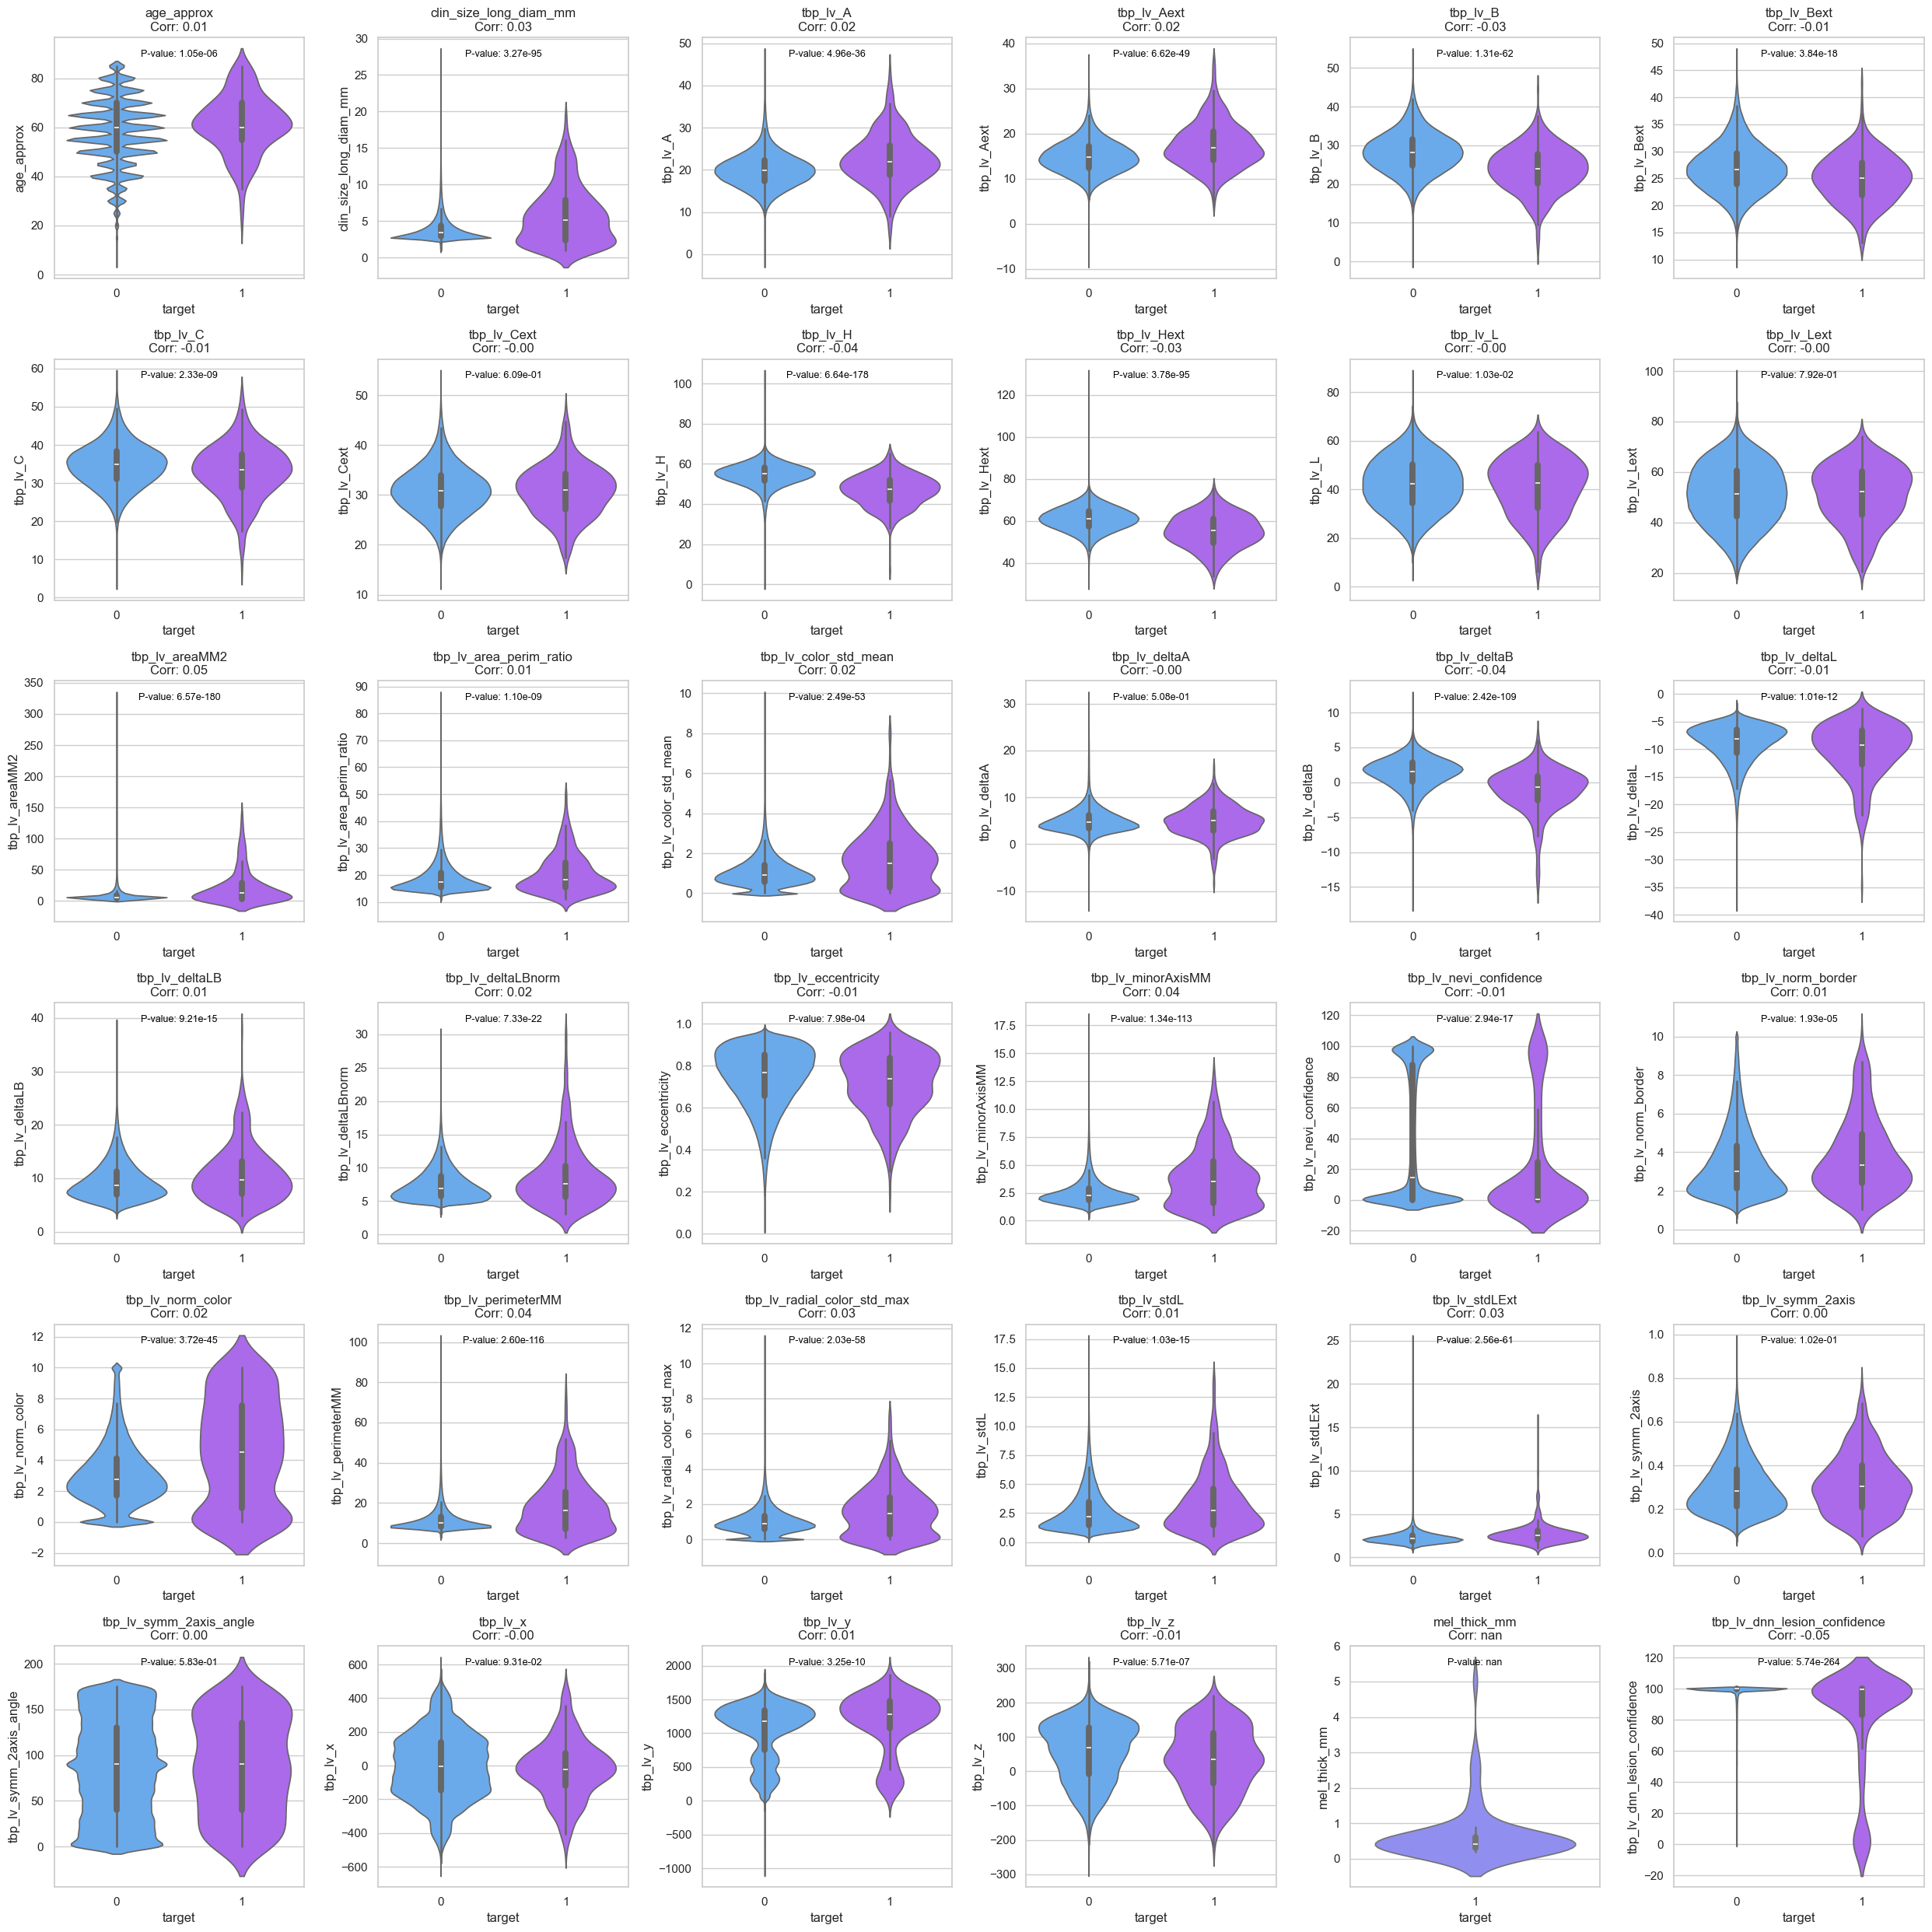

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Load the dataset
df = pd.read_csv('./dataset/train-metadata.csv')

# Select numeric columns, excluding 'target'
numeric_columns = df.select_dtypes(include=['number'])
if 'target' in numeric_columns.columns:
    numeric_columns = numeric_columns.drop(columns=['target'])

# Create a figure with a size suitable for 36 plots (6x6)
fig, axes = plt.subplots(6, 6, figsize=(25, 25))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate over the numeric columns
for idx, column in enumerate(numeric_columns.columns):
    # Create a temporary DataFrame excluding null values for the column and 'target'
    df_temp = df[['target', column]].dropna()
    
    # Calculate the point-biserial correlation between 'target' and the column
    correlation, p_value = pointbiserialr(df_temp['target'], df_temp[column])
    
    # Create a violin plot for the current column
    sns.violinplot(x='target', y=column, data=df_temp, ax=axes[idx], palette="cool")
    
    # Set the title with the correlation value
    axes[idx].set_title(f'{column}\nCorr: {correlation:.2f}')
    
    # Optional: Annotate the p-value if desired
    axes[idx].annotate(f'P-value: {p_value:.2e}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='top', fontsize=9, color='black')

# Remove any unused subplots
for j in range(len(numeric_columns.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()


# Distribution of melanoma thickness by age group

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\394553393.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='age_approx', y='mel_thick_mm', data=df, palette="cool")
C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\394553393.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='sex', y='mel_thick_mm', data=df, palette="cool")


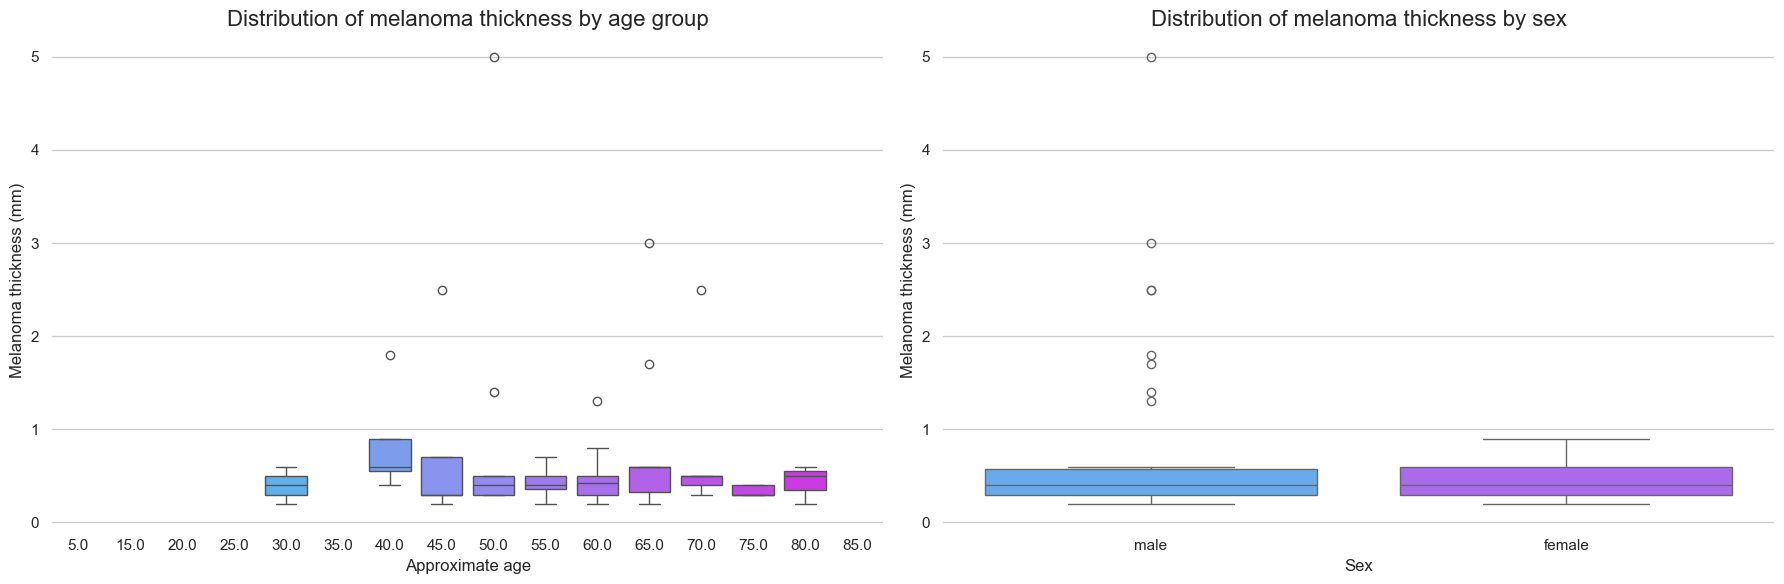

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(ax=axes[0], x='age_approx', y='mel_thick_mm', data=df, palette="cool")
axes[0].set_title('Distribution of melanoma thickness by age group', fontsize=16)
axes[0].set_xlabel('Approximate age')
axes[0].set_ylabel('Melanoma thickness (mm)')

# 2. Boxplot: Distribution of melanoma thickness by sex
sns.boxplot(ax=axes[1], x='sex', y='mel_thick_mm', data=df, palette="cool")
axes[1].set_title('Distribution of melanoma thickness by sex', fontsize=16)
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Melanoma thickness (mm)')

# Show the figure with both subplots
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# inside lesion/outside lesion

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\392224610.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/train-metadata.csv')


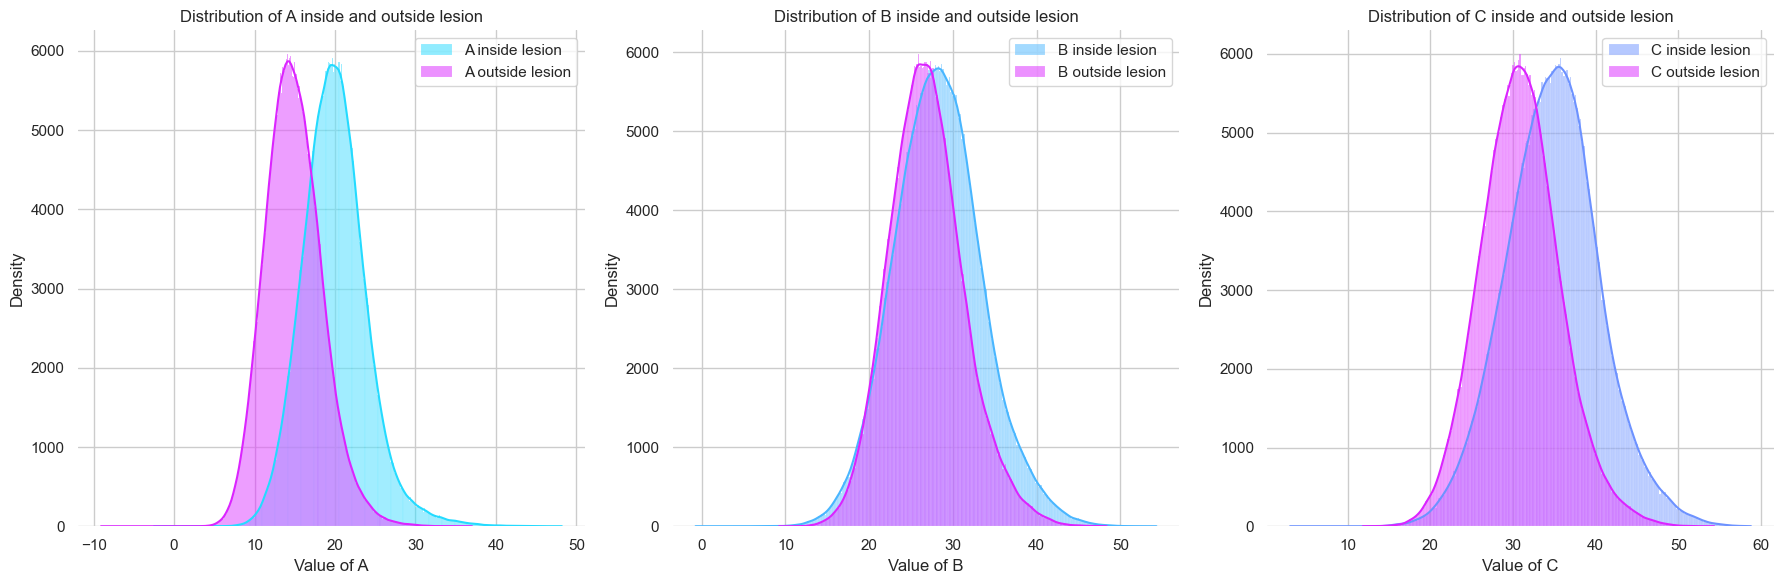

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./dataset/train-metadata.csv')

# Define the color palette
palette = "cool"

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'tbp_lv_A'
sns.histplot(df['tbp_lv_A'], kde=True, label='A inside lesion', ax=axes[0], color=sns.color_palette(palette)[0])
sns.histplot(df['tbp_lv_Aext'], kde=True, label='A outside lesion', ax=axes[0], color=sns.color_palette(palette)[5])
axes[0].set_title('Distribution of A inside and outside lesion')
axes[0].set_xlabel('Value of A')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plot for 'tbp_lv_B'
sns.histplot(df['tbp_lv_B'], kde=True, label='B inside lesion', ax=axes[1], color=sns.color_palette(palette)[1])
sns.histplot(df['tbp_lv_Bext'], kde=True, label='B outside lesion', ax=axes[1], color=sns.color_palette(palette)[5])
axes[1].set_title('Distribution of B inside and outside lesion')
axes[1].set_xlabel('Value of B')
axes[1].set_ylabel('Density')
axes[1].legend()

# Plot for 'tbp_lv_C'
sns.histplot(df['tbp_lv_C'], kde=True, label='C inside lesion', ax=axes[2], color=sns.color_palette(palette)[2])
sns.histplot(df['tbp_lv_Cext'], kde=True, label='C outside lesion', ax=axes[2], color=sns.color_palette(palette)[5])
axes[2].set_title('Distribution of C inside and outside lesion')
axes[2].set_xlabel('Value of C')
axes[2].set_ylabel('Density')
axes[2].legend()

# Remove top and right spines
sns.despine(left=True, bottom=True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#ac6cec; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #6cb0f4">Multicollinearity Issues</p>

C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\362519877.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/train-metadata.csv')


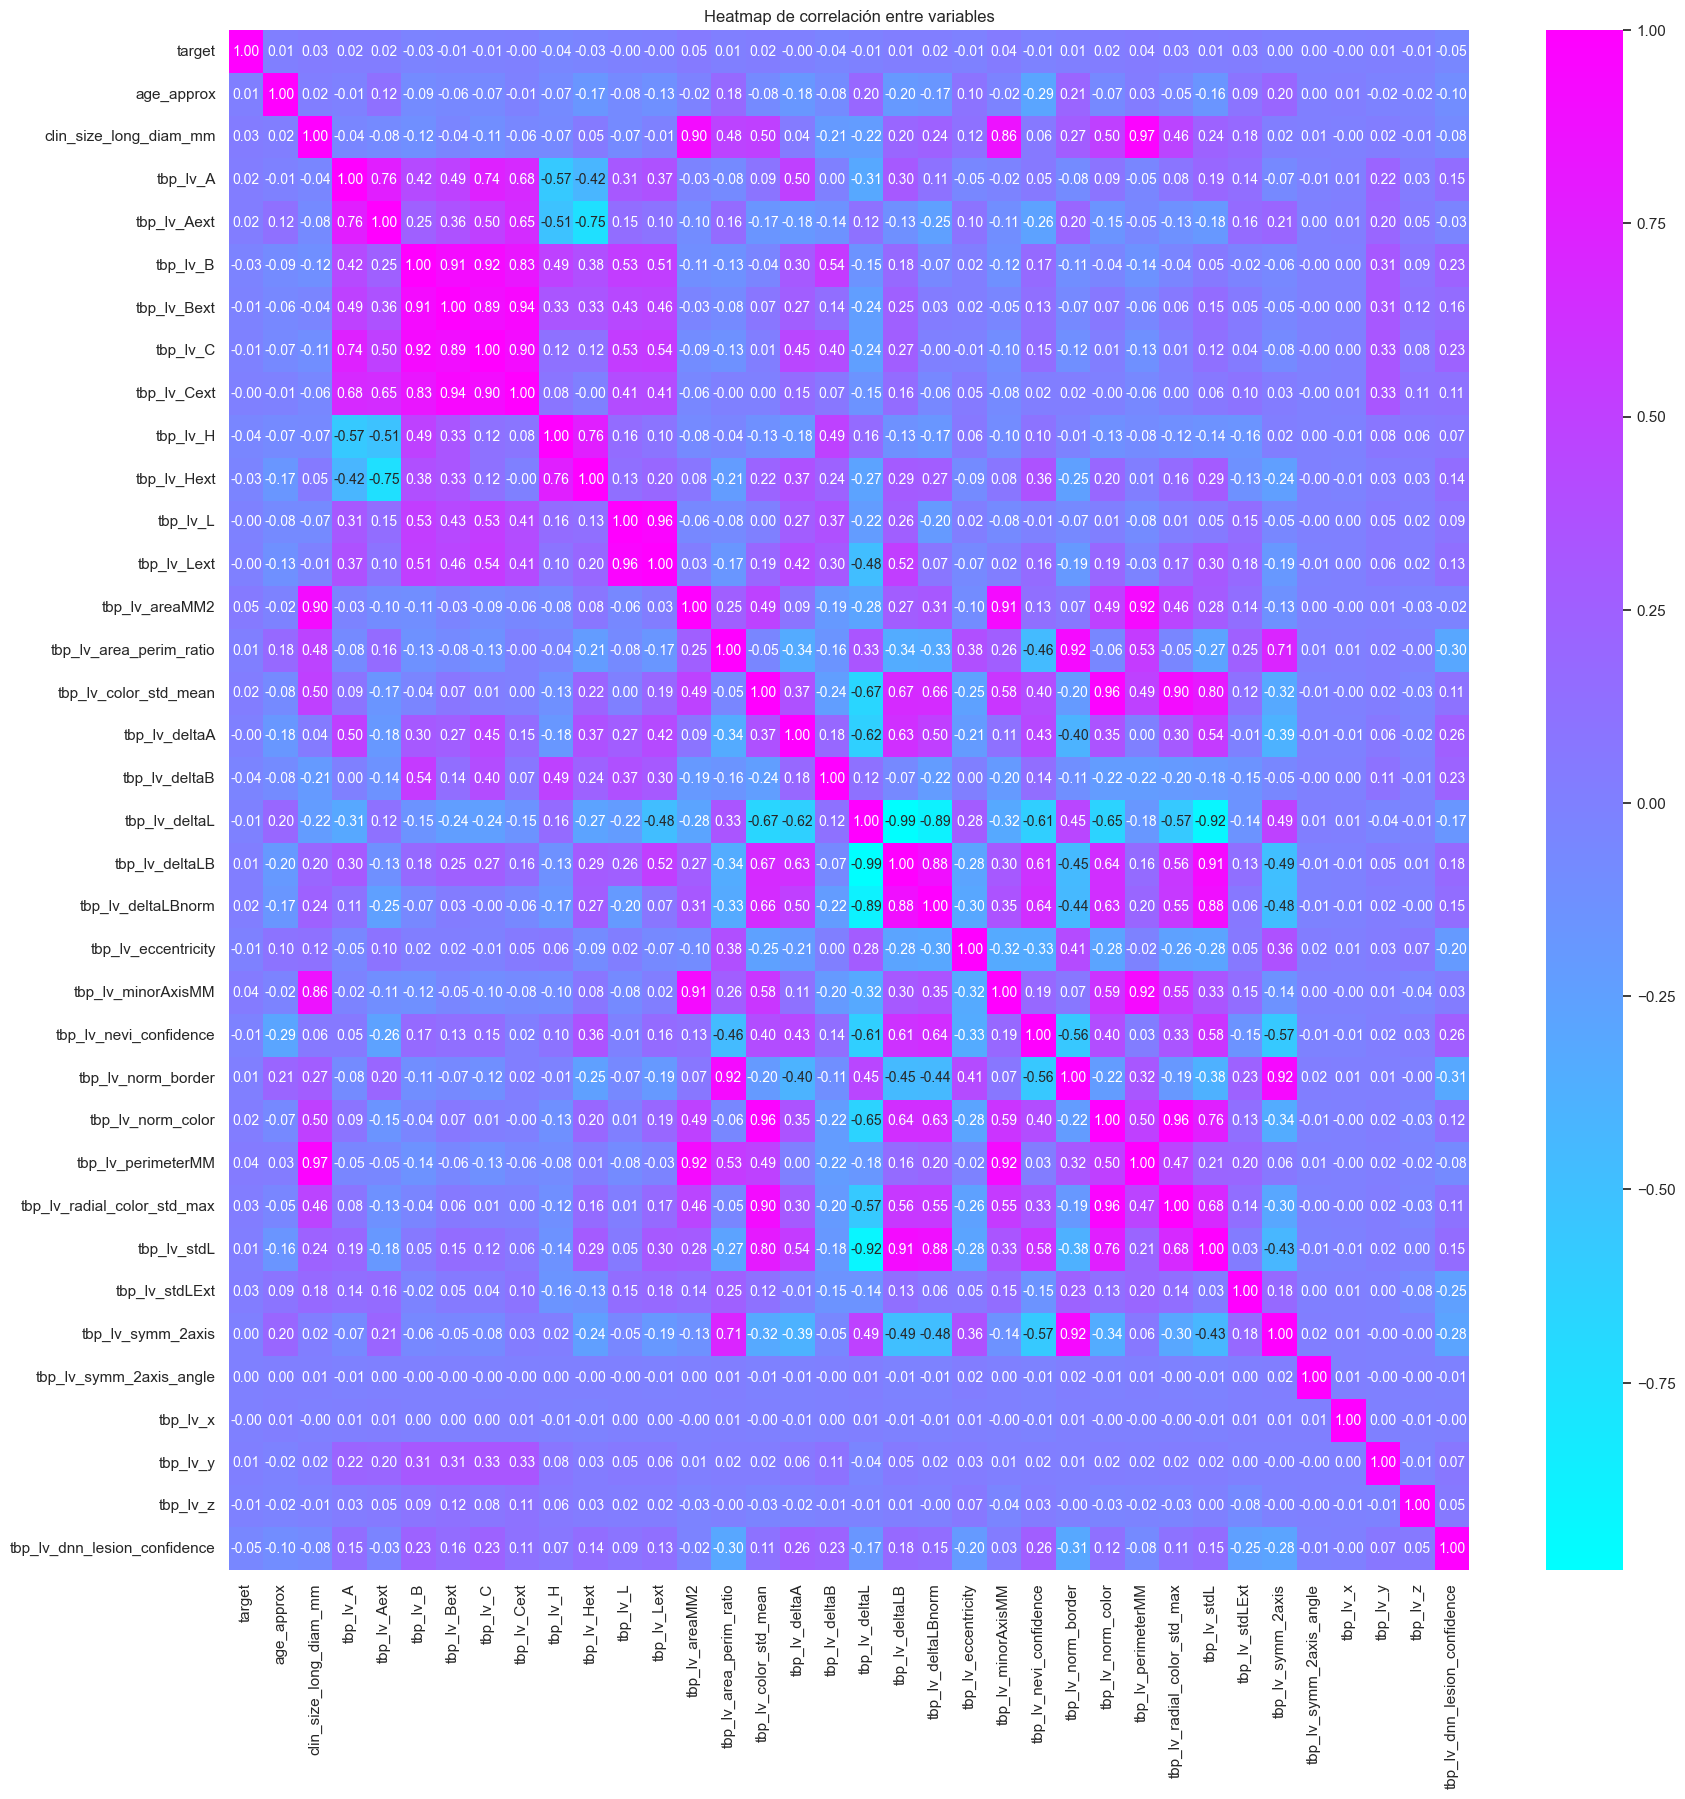

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./dataset/train-metadata.csv')

# Select numeric columns and drop 'mel_thick_mm'
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop("mel_thick_mm", axis=1, errors='ignore')  # Use errors='ignore' to avoid error if column doesn't exist

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='cool', annot_kws={'size': 10})
plt.title('Heatmap de correlación entre variables')
plt.show()


Target Distribution:
 target
0    400666
1       393
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\3236615070.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')


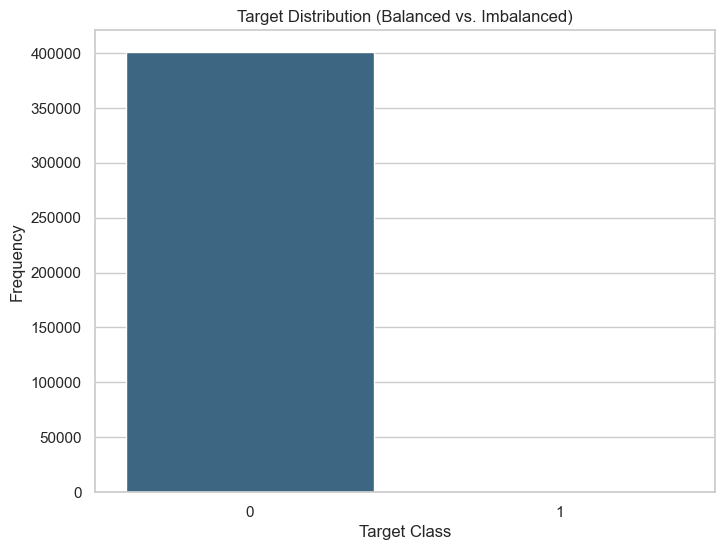

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv('./dataset/train-metadata.csv', low_memory=False)

# Check the distribution of the 'target' column
target_distribution = train_df['target'].value_counts()

# Print the distribution
print("Target Distribution:\n", target_distribution)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')
plt.title('Target Distribution (Balanced vs. Imbalanced)')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.show()

In [51]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Separate features and target
X = train_df.drop('target', axis=1)
y = train_df['target']

# Apply undersampling
X_res, y_res = undersampler.fit_resample(X, y)

# Combine back into a balanced DataFrame
train_df_balanced = pd.concat([X_res, y_res], axis=1)

# Check the new target distribution
print("Balanced Target Distribution:\n", y_res.value_counts())

Balanced Target Distribution:
 target
0    393
1    393
Name: count, dtype: int64


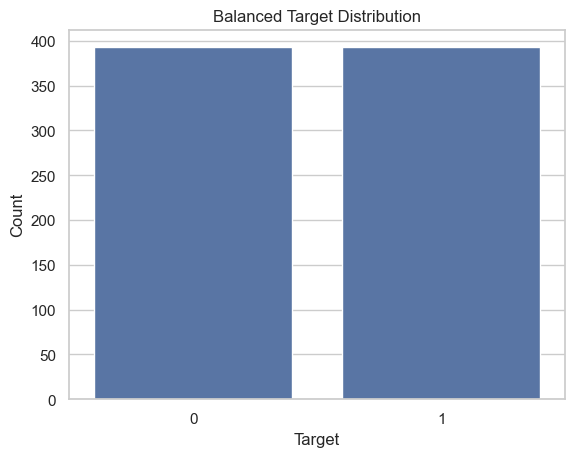

In [52]:
# Plot the balanced target distribution
sns.countplot(x=y_res)
plt.title('Balanced Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [53]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Separate features and target
X = train_df.drop('target', axis=1)
y = train_df['target']

# Apply undersampling
X_res, y_res = undersampler.fit_resample(X, y)

# Combine back into a balanced DataFrame
train_df_balanced = pd.concat([X_res, y_res], axis=1)

# Save the balanced DataFrame to a CSV file at the specified path
output_path = './dataset/submissionnew.csv'
train_df_balanced.to_csv(output_path, index=False)

print(f"Balanced dataset saved to '{output_path}'")


Balanced dataset saved to './dataset/submissionnew.csv'


Original Target Distribution:
 target
0    400666
1       393
Name: count, dtype: int64
Balanced Target Distribution:
 target
0    400666
1    400666
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_46888\3838437872.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_target_distribution.index, y=balanced_target_distribution.values, palette='viridis')


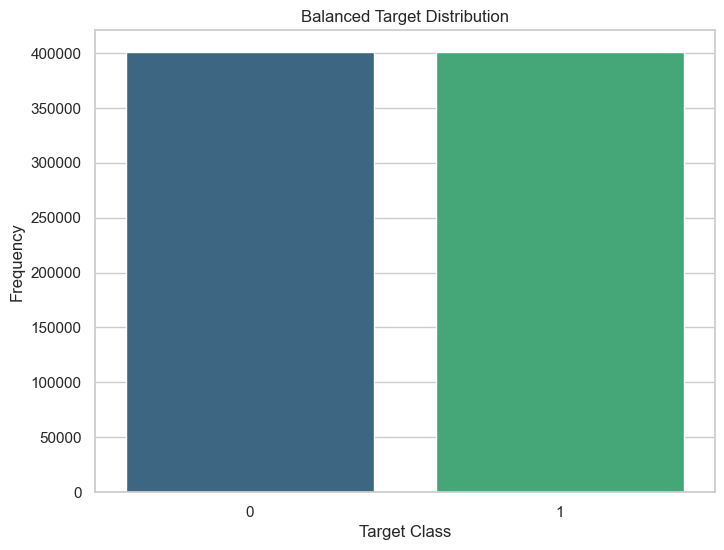

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Load the dataset
train_df = pd.read_csv('./dataset/train-metadata.csv', low_memory=False)

# Check the distribution of the 'target' column
target_distribution = train_df['target'].value_counts()

# Print the original distribution
print("Original Target Distribution:\n", target_distribution)

# Separate majority and minority classes
majority_class = train_df[train_df['target'] == target_distribution.idxmax()]
minority_class = train_df[train_df['target'] == target_distribution.idxmin()]

# Perform oversampling on the minority class
minority_class_oversampled = resample(minority_class,
                                      replace=True,   # Sample with replacement
                                      n_samples=len(majority_class),  # Match the majority class
                                      random_state=42)  # Set seed for reproducibility

# Combine majority class with oversampled minority class
train_df_balanced = pd.concat([majority_class, minority_class_oversampled])

# Check the new distribution
balanced_target_distribution = train_df_balanced['target'].value_counts()
print("Balanced Target Distribution:\n", balanced_target_distribution)

# Save the balanced dataset to a CSV file
balanced_dataset_path = './dataset/balanced_dataset.csv'
train_df_balanced.to_csv(balanced_dataset_path, index=False)

# Plot the balanced distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=balanced_target_distribution.index, y=balanced_target_distribution.values, palette='viridis')
plt.title('Balanced Target Distribution')
plt.xlabel('Target Class')
plt.ylabel('Frequency')

plot_path = './dataset/Balanced_Target_Distribution1.png'
plt.savefig(plot_path)

plt.show()

# CNN WITH PYTORCH

In [ ]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load metadata
# train_df = pd.read_csv('./dataset/train-metadata.csv')

# # Convert target column to string if it's not already
# train_df['target'] = train_df['target'].astype(str)

# # Image paths
# image_path_list = ["./dataset/train-image/image/{id}.jpg".format(id=id) for id in train_df['isic_id']]

# # Add image paths to dataframe
# train_df['image_path'] = image_path_list

# # Data split
# train_data, test_data = train_test_split(train_df, test_size=0.2, random_state=42)

# # Data generators
# datagen = ImageDataGenerator(rescale=1./255., validation_split=0.2)

# train_generator = datagen.flow_from_dataframe(
#     dataframe=train_data,
#     x_col='image_path',
#     y_col='target',  # Ensure 'target' is a string
#     subset="training",
#     batch_size=32,
#     seed=42,
#     shuffle=True,
#     class_mode="binary",
#     target_size=(224, 224)
# )

# validation_generator = datagen.flow_from_dataframe(
#     dataframe=train_data,
#     x_col='image_path',
#     y_col='target',
#     subset="validation",
#     batch_size=32,
#     seed=42,
#     shuffle=True,
#     class_mode="binary",
#     target_size=(224, 224)
# )

# test_generator = ImageDataGenerator(rescale=1./255.).flow_from_dataframe(
#     dataframe=test_data,
#     x_col='image_path',
#     y_col='target',
#     batch_size=32,
#     seed=42,
#     shuffle=False,
#     class_mode="binary",
#     target_size=(224, 224)
# )

# # Model building
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)  # Updated file extension

# # Model training
# history = model.fit(
#     train_generator,
#     validation_data=validation_generator,
#     epochs=20,
#     callbacks=[early_stopping, checkpoint]
# )

# # Load the best model
# model.load_weights('best_model.keras')

# # Model evaluation
# test_generator.reset()
# y_pred = model.predict(test_generator)
# y_pred = np.where(y_pred > 0.5, 1, 0).flatten()

# y_true = test_data['target'].astype(int).values  # Convert to integers for evaluation

# accuracy = accuracy_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# specificity = tn / (tn + fp)

# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")
# print(f"Specificity: {specificity}")

# # Plotting accuracy and validation accuracy
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')
# plt.show()

# # Plotting loss and validation loss
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')
# plt.show()


In [ ]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load metadata
# train_df = pd.read_csv('./dataset/train-metadata.csv')

# # Convert target column to string if it's not already
# train_df['target'] = train_df['target'].astype(str)

# # Define image ID range
# start_id = 15670
# end_id = 5624101

# # Filter the dataframe to include only the relevant image IDs
# train_df['isic_id_int'] = train_df['isic_id'].str.extract('(\d+)').astype(int)
# filtered_df = train_df[(train_df['isic_id_int'] >= start_id) & (train_df['isic_id_int'] <= end_id)]

# # Image paths
# filtered_df['image_path'] = "./dataset/train-image/image/" + filtered_df['isic_id'] + ".jpg"

# # Data split
# train_data, test_data = train_test_split(filtered_df, test_size=0.2, random_state=42)

# # Data generators
# datagen = ImageDataGenerator(rescale=1./255., validation_split=0.2)

# train_generator = datagen.flow_from_dataframe(
#     dataframe=train_data,
#     x_col='image_path',
#     y_col='target',
#     subset="training",
#     batch_size=32,
#     seed=42,
#     shuffle=True,
#     class_mode="binary",
#     target_size=(224, 224)
# )

# validation_generator = datagen.flow_from_dataframe(
#     dataframe=train_data,
#     x_col='image_path',
#     y_col='target',
#     subset="validation",
#     batch_size=32,
#     seed=42,
#     shuffle=True,
#     class_mode="binary",
#     target_size=(224, 224)
# )

# test_generator = ImageDataGenerator(rescale=1./255.).flow_from_dataframe(
#     dataframe=test_data,
#     x_col='image_path',
#     y_col='target',
#     batch_size=32,
#     seed=42,
#     shuffle=False,
#     class_mode="binary",
#     target_size=(224, 224)
# )

# # Model building
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)  # Updated file extension

# # Model training
# history = model.fit(
#     train_generator,
#     validation_data=validation_generator,
#     epochs=20,
#     callbacks=[early_stopping, checkpoint]
# )

# # Load the best model
# model.load_weights('best_model.keras')

# # Model evaluation
# test_generator.reset()
# y_pred = model.predict(test_generator)
# y_pred = np.where(y_pred > 0.5, 1, 0).flatten()

# y_true = test_data['target'].astype(int).values  # Convert to integers for evaluation

# accuracy = accuracy_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# specificity = tn / (tn + fp)

# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")
# print(f"Specificity: {specificity}")

# # Plotting accuracy and validation accuracy
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')
# plt.show()

# # Plotting loss and validation loss
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')
# plt.show()
